<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Breakfast-at-the-Frat-Time-Series-Analysis/blob/main/Breakfast_at_the_Frat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1- Conhecendo os dados**

https://github.com/Druggist911/Breakfast-at-the-Frat/blob/master/Breakfast%20at%20the%20Frat_%20Preprcessing%20%26%20EDA.ipynb
https://github.com/Druggist911/Breakfast-at-the-Frat/blob/master/Breakfast%20at%20the%20Frat%20Modeling.ipynb

https://github.com/Druggist911/Breakfast-at-the-Frat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

In [ ]:
arquivo_excel = pd.ExcelFile("/content/drive/MyDrive/Portfólio/dunnhumby _Breakfast-at-the-Frat/dunnhumby - Breakfast at the Frat.xlsx")

## **1.1 - data set lojas**

In [ ]:
#extraindo as abas

lojas = pd.read_excel(arquivo_excel, sheet_name='dh Store Lookup', header=1)# index_col='STORE_ID'
lojas.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24766.807692,NaN,NaN,NaN,NaN,NaN,NaN
1,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54052.519231,NaN,NaN,NaN,NaN,NaN,NaN
2,4259,WARSAW AVENUE,CINCINNATI,OH,17140,VALUE,NaN,48813,31177.333333,NaN,NaN,NaN,NaN,NaN,NaN
3,6379,KINGWOOD,KINGWOOD,TX,26420,MAINSTREAM,NaN,50237,20620.423077,NaN,NaN,NaN,NaN,NaN,NaN
4,6431,AT WARD ROAD,BAYTOWN,TX,26420,VALUE,350.0,43698,24321.942308,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STORE_ID                 79 non-null     int64  
 1   STORE_NAME               79 non-null     object 
 2   ADDRESS_CITY_NAME        79 non-null     object 
 3   ADDRESS_STATE_PROV_CODE  79 non-null     object 
 4   MSA_CODE                 79 non-null     int64  
 5   SEG_VALUE_NAME           79 non-null     object 
 6   PARKING_SPACE_QTY        27 non-null     float64
 7   SALES_AREA_SIZE_NUM      79 non-null     int64  
 8   AVG_WEEKLY_BASKETS       79 non-null     float64
 9   Unnamed: 9               0 non-null      float64
 10  Unnamed: 10              0 non-null      float64
 11  Unnamed: 11              0 non-null      float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14              0 n

In [ ]:
lojas.isna().sum() #as colunas de 8 a 13 estão vazias, portanto podemos excluí-las. Temos alguns valores faltantes mas cuidaremos disso depois

STORE_ID                    0
STORE_NAME                  0
ADDRESS_CITY_NAME           0
ADDRESS_STATE_PROV_CODE     0
MSA_CODE                    0
SEG_VALUE_NAME              0
PARKING_SPACE_QTY          52
SALES_AREA_SIZE_NUM         0
AVG_WEEKLY_BASKETS          0
Unnamed: 9                 79
Unnamed: 10                79
Unnamed: 11                79
Unnamed: 12                79
Unnamed: 13                79
Unnamed: 14                79
dtype: int64

In [ ]:
lojas.drop(['Unnamed: 9', 'Unnamed: 10','Unnamed: 11','Unnamed: 12', 'Unnamed: 13','Unnamed: 14'], axis=1, inplace=True)

In [ ]:
lojas.describe()

,STORE_ID,MSA_CODE,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
count,79.000000,79.000000,27.000000,79.000000,79.000000
mean,14502.468354,21236.202532,480.518519,49145.164557,24146.806232
std,8868.762031,6138.649376,403.659641,13512.452153,8720.396844
min,367.000000,13140.000000,17.000000,10788.000000,10434.705128
25%,6183.000000,17140.000000,282.000000,43067.500000,17522.432692
50%,15541.000000,19100.000000,351.000000,48594.000000,24567.750000
75%,23058.000000,26420.000000,488.500000,55200.500000,29186.262821
max,29159.000000,47540.000000,1859.000000,86517.000000,54052.519231


### **1.1.2 -Localização das lojas**

In [ ]:
len(lojas.ADDRESS_CITY_NAME.unique()) # lojas espalhadas por 51 cidades

51

Text(0.5, 1.0, 'Quantidade de lojas em cada cidade')

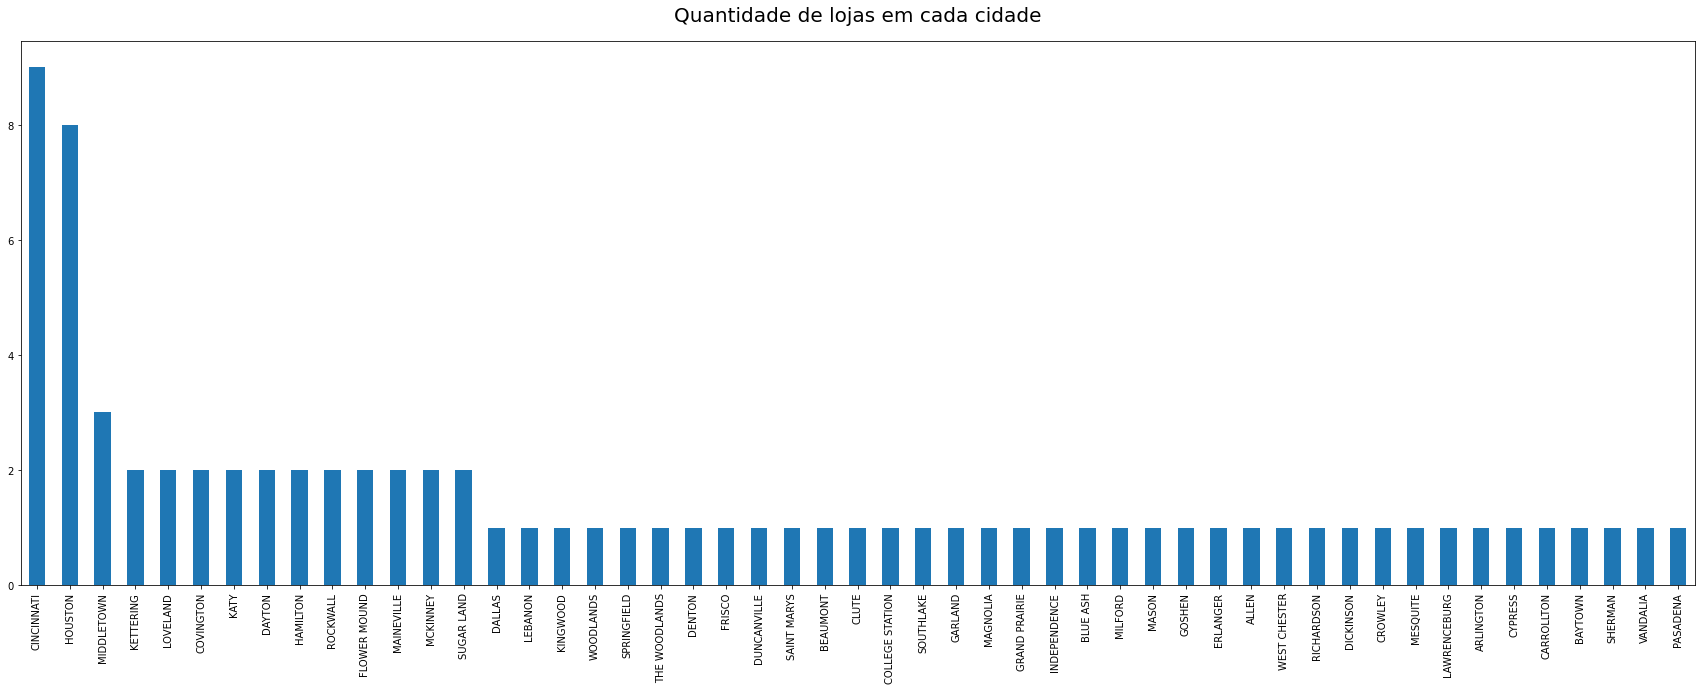

In [ ]:
cidade = lojas.ADDRESS_CITY_NAME.value_counts()
ax= cidade.plot(kind='bar', figsize=(30,10))
ax.set_title('Quantidade de lojas em cada cidade', fontsize=20, pad=20)

Text(0.5, 1.0, 'Quantidade de lojas em cada Estado')

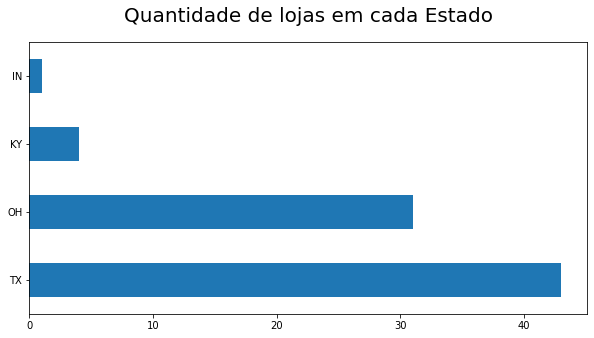

In [ ]:
estados= lojas['ADDRESS_STATE_PROV_CODE'].value_counts()
ax= estados.plot(kind='barh', figsize=(10,5))
ax.set_title('Quantidade de lojas em cada Estado', fontsize=20, pad=20)


[Text(0, 0, 'Convencional'), Text(0, 0, 'Média'), Text(0, 0, 'Sofisticada')]

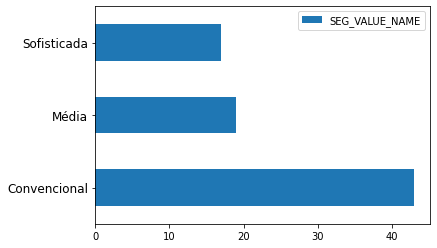

In [ ]:
tipo_de_loja = lojas.SEG_VALUE_NAME.value_counts().reset_index()
ax= tipo_de_loja.plot(kind='barh')
ax.set_yticklabels(['Convencional', 'Média','Sofisticada'], fontsize=12)


### **Tamanho das Lojas, Área do Estacionamento e Média de Cestos**

In [ ]:
lojas[['PARKING_SPACE_QTY',"SALES_AREA_SIZE_NUM","AVG_WEEKLY_BASKETS"]].describe()

,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
count,27.000000,79.000000,79.000000
mean,480.518519,49145.164557,24146.806232
std,403.659641,13512.452153,8720.396844
min,17.000000,10788.000000,10434.705128
25%,282.000000,43067.500000,17522.432692
50%,351.000000,48594.000000,24567.750000
75%,488.500000,55200.500000,29186.262821
max,1859.000000,86517.000000,54052.519231


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83497bce90>,
      dtype=object)

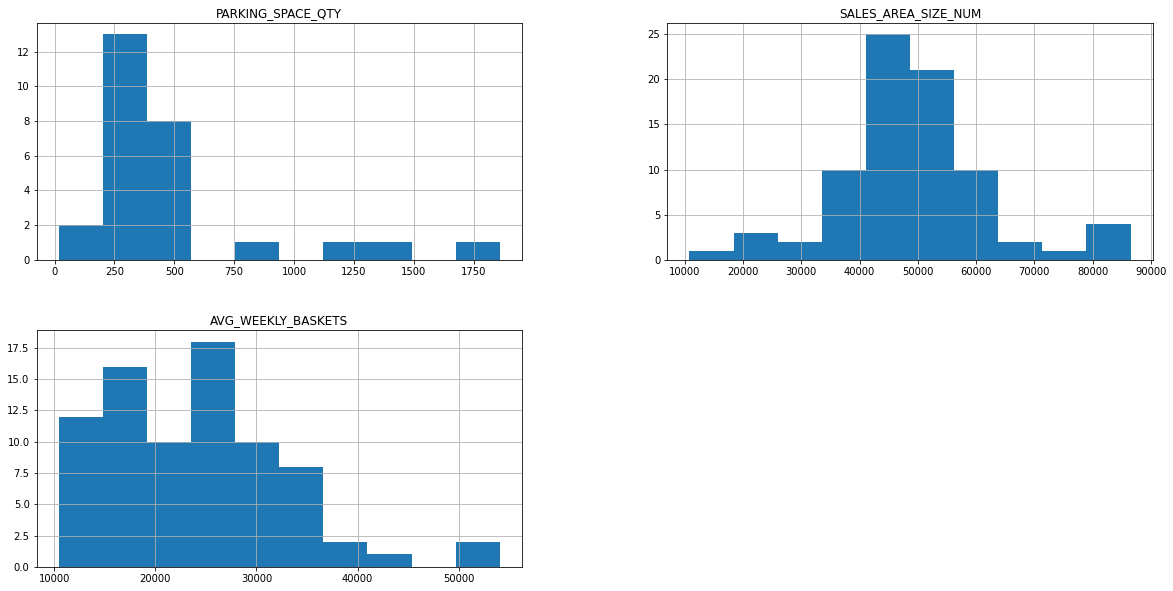

In [ ]:
lojas[['PARKING_SPACE_QTY',"SALES_AREA_SIZE_NUM","AVG_WEEKLY_BASKETS"]].hist(figsize=(20,10))

Text(0.25, 0.04, 'Relação entre o Tipo de loja com a Média de Vendas Semanais e Tamanho da Loja')

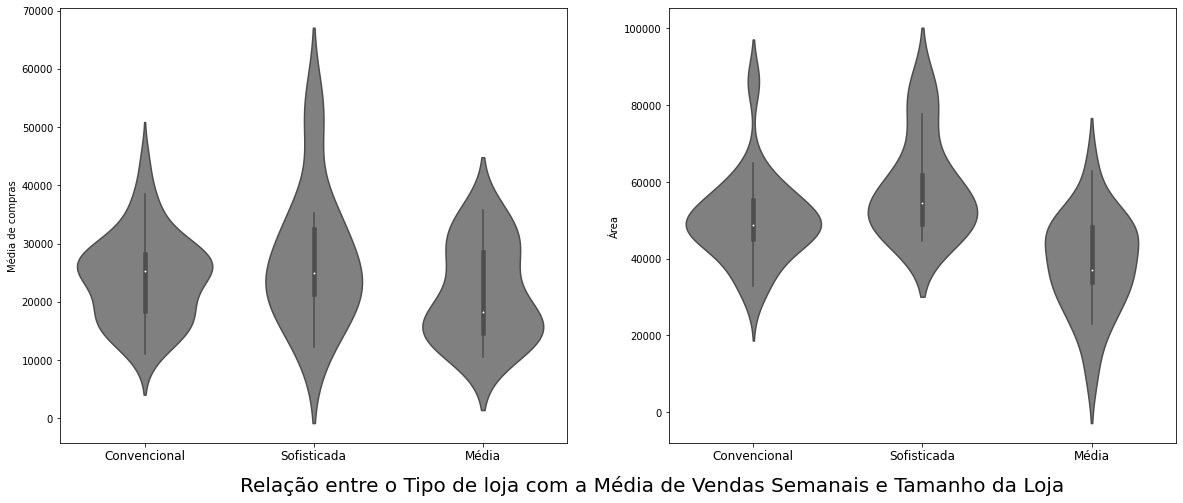

In [ ]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,8), sharex=True)

ax = sns.violinplot(x="SEG_VALUE_NAME", y="AVG_WEEKLY_BASKETS", data=lojas, ax=axis1, color='gray')
ax.set_xticklabels(['Convencional','Sofisticada', 'Média'], fontsize=12)
ax.set_xlabel(None)
ax.set_ylabel('Média de compras')

ax = sns.violinplot(x="SEG_VALUE_NAME", y="SALES_AREA_SIZE_NUM", data=lojas, ax=axis2, color='gray')
ax.set_xticklabels(['Convencional','Sofisticada', 'Média'], fontsize=12)
ax.set_xlabel(None)
ax.set_ylabel('Média de Vendas Semanais')
ax.set_ylabel('Área')




fig.text(0.25,0.04, 'Relação entre o Tipo de loja com a Média de Vendas Semanais e Tamanho da Loja', fontsize=20)


## **1.2 - dataset produtos**

In [ ]:
produtos = pd.read_excel(arquivo_excel, sheet_name='dh Products Lookup', header=1)#  index_col='UPC'
produtos.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UPC           58 non-null     int64  
 1   DESCRIPTION   58 non-null     object 
 2   MANUFACTURER  58 non-null     object 
 3   CATEGORY      58 non-null     object 
 4   SUB_CATEGORY  58 non-null     object 
 5   PRODUCT_SIZE  58 non-null     object 
 6   Unnamed: 6    0 non-null      float64
 7   Unnamed: 7    0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
dtypes: float64(9), int64(1), object(5)
memory usage: 6.9+ KB


In [ ]:
produtos.isna().sum() #as colunas não nomeadas estão com vazias. Portanto as excluíremos

UPC              0
DESCRIPTION      0
MANUFACTURER     0
CATEGORY         0
SUB_CATEGORY     0
PRODUCT_SIZE     0
Unnamed: 6      58
Unnamed: 7      58
Unnamed: 8      58
Unnamed: 9      58
Unnamed: 10     58
Unnamed: 11     58
Unnamed: 12     58
Unnamed: 13     58
Unnamed: 14     58
dtype: int64

In [ ]:
produtos.drop(columns=['Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9', 'Unnamed: 10','Unnamed: 11','Unnamed: 12', 'Unnamed: 13','Unnamed: 14'], inplace=True)

### **Tipos de Produtos**

In [ ]:
print(f'Há {produtos.DESCRIPTION.unique().size} produtos divididos em {produtos.CATEGORY.unique().size} categorias.')      

Há 55 produtos divididos em 4 categorias.


Text(0.5, 1.0, 'Distribuição da Categoria de Produtos')

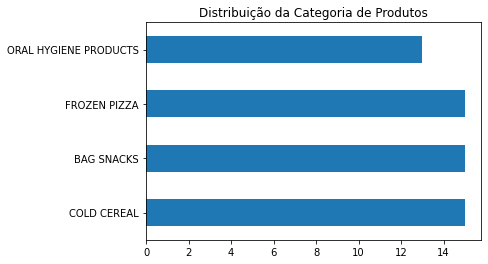

In [ ]:
produtos.CATEGORY.value_counts().plot(kind='barh')
plt.title('Distribuição da Categoria de Produtos')

In [ ]:
a.index

Index(['PRETZELS', 'PIZZA/PREMIUM', 'MOUTHWASHES (ANTISEPTIC)',
       'ALL FAMILY CEREAL', 'MOUTHWASH/RINSES AND SPRAYS', 'KIDS CEREAL',
       'ADULT CEREAL'],
      dtype='object')

Text(0.5, 1.0, 'Distribuição da Sub-Categoria de Produtos')

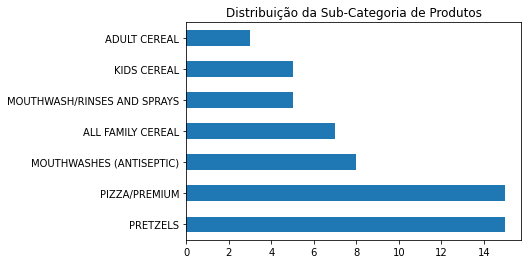

In [ ]:
produtos.SUB_CATEGORY.value_counts().plot(kind='barh')
plt.title('Distribuição da Sub-Categoria de Produtos')

### Fabricantes e Fornecedores

In [ ]:
produtos.groupby('MANUFACTURER')['CATEGORY'].value_counts()


[[MANUFACTURER   CATEGORY             
  CHATTEM        ORAL HYGIENE PRODUCTS    3
  COLGATE        ORAL HYGIENE PRODUCTS    1
  FRITO LAY      BAG SNACKS               3
  GENERAL MI     COLD CEREAL              3
  HOME RUN       FROZEN PIZZA             3
  KELLOGG        COLD CEREAL              3
  KING           FROZEN PIZZA             3
  MKSL           BAG SNACKS               3
  P & G          ORAL HYGIENE PRODUCTS    3
  POST FOODS     COLD CEREAL              3
  PRIVATE LABEL  BAG SNACKS               3
                 COLD CEREAL              3
                 FROZEN PIZZA             3
                 ORAL HYGIENE PRODUCTS    3
  QUAKER         COLD CEREAL              3
  SHULTZ         BAG SNACKS               3
  SNYDER S       BAG SNACKS               3
  TOMBSTONE      FROZEN PIZZA             3
  TONYS          FROZEN PIZZA             3
  WARNER         ORAL HYGIENE PRODUCTS    3
  Name: CATEGORY, dtype: int64]]

## **1.3 - data set vendas**

In [ ]:
vendas = pd.read_excel(arquivo_excel, sheet_name='dh Transaction Data', header=1)  #index_col='WEEK_END_DATE'
vendas.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2009-01-14,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1,NaN,NaN,NaN
1,2009-01-14,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0,NaN,NaN,NaN
2,2009-01-14,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0,NaN,NaN,NaN
3,2009-01-14,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1,NaN,NaN,NaN
4,2009-01-14,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0,NaN,NaN,NaN


In [ ]:
vendas.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524950 entries, 0 to 524949
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   WEEK_END_DATE  524950 non-null  datetime64[ns]
 1   STORE_NUM      524950 non-null  int64         
 2   UPC            524950 non-null  int64         
 3   UNITS          524950 non-null  int64         
 4   VISITS         524950 non-null  int64         
 5   HHS            524950 non-null  int64         
 6   SPEND          524950 non-null  float64       
 7   PRICE          524927 non-null  float64       
 8   BASE_PRICE     524765 non-null  float64       
 9   FEATURE        524950 non-null  int64         
 10  DISPLAY        524950 non-null  int64         
 11  TPR_ONLY       524950 non-null  int64         
 12  Unnamed: 12    0 non-null       float64       
 13  Unnamed: 13    0 non-null       float64       
 14  Unnamed: 14    0 non-null       float64       
dtype

In [ ]:
vendas.isna().sum()

WEEK_END_DATE         0
STORE_NUM             0
UPC                   0
UNITS                 0
VISITS                0
HHS                   0
SPEND                 0
PRICE                23
BASE_PRICE          185
FEATURE               0
DISPLAY               0
TPR_ONLY              0
Unnamed: 12      524950
Unnamed: 13      524950
Unnamed: 14      524950
dtype: int64

In [ ]:
vendas.drop(columns=['Unnamed: 12', 'Unnamed: 13','Unnamed: 14'], inplace=True)

In [ ]:
vendas.rename(columns={'STORE_NUM': 'STORE_ID'}, inplace=True) #para manter o mesmo nome com o dataset lojas e poder relacioná-los

In [ ]:
vendas[['UNITS','VISITS','SPEND','PRICE','BASE_PRICE','DISPLAY']].describe()

,UNITS,VISITS,SPEND,PRICE,BASE_PRICE,DISPLAY
count,524950.000000,524950.000000,524950.000000,524927.000000,524765.000000,524950.000000
mean,19.608256,17.167349,53.200729,3.382174,3.602747,0.110134
std,29.934184,24.740741,68.180697,1.559303,1.631726,0.313057
min,0.000000,1.000000,0.000000,0.000000,0.550000,0.000000
25%,4.000000,4.000000,13.360000,2.360000,2.500000,0.000000
50%,10.000000,9.000000,31.920000,2.990000,3.170000,0.000000
75%,24.000000,21.000000,67.600000,4.490000,4.590000,0.000000
max,1800.000000,1340.000000,2952.000000,11.460000,11.460000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8332280e50>,
      dtype=object)

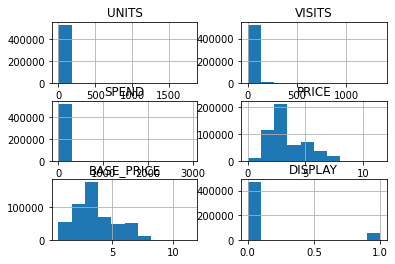

In [ ]:
vendas[['UNITS','VISITS','SPEND','PRICE','BASE_PRICE','DISPLAY']].hist()

## **1.4 - Combinando os DataSets para gerar visualizações**

In [2]:
tudo_junto = pd.read_csv('/content/drive/MyDrive/Portfólio/dunnhumby _Breakfast-at-the-Frat/tudo_junto.csv')

In [ ]:
tudo_junto = vendas.merge(produtos, on='UPC').merge(lojas, how='outer', on='STORE_ID')
tudo_junto.to_csv('tudo_junto.csv')
tudo_junto.head()

### **Data do Final da semana**


In [4]:
datas = tudo_junto.WEEK_END_DATE.value_counts(sort=False).reset_index().sort_values('index').set_index('index')
#separamos a frequência das datas, colocamos a data como index e foi rdenada em ondem crescente e setada como index
datas.head()

,WEEK_END_DATE
index,
2009-01-14,3241
2009-01-21,3213
2009-01-28,3216
2009-02-04,3205
2009-02-11,3170


Text(0.5, 1.0, 'Datas')

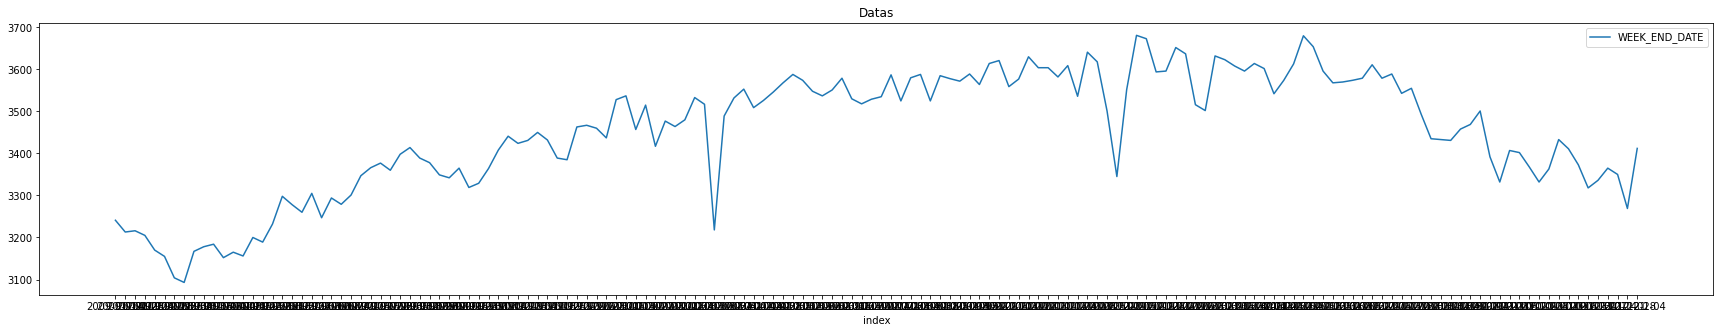

In [5]:
fig, eixo = plt.subplots(figsize=(30,5))

sns.lineplot(data=datas)
plt.title("Datas")

### **Unidades Vendidas**

Text(0.5, 1.0, 'Unidades Vendidas por Categoria de Produtos')

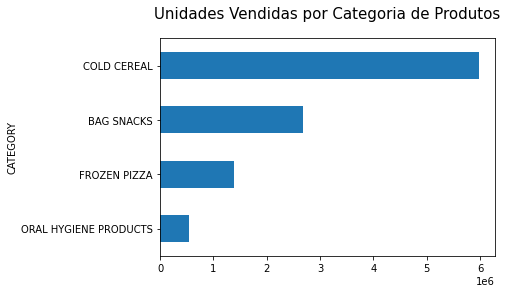

In [6]:
unidades_categoria = tudo_junto.groupby('CATEGORY')['UNITS'].sum()
unidades_categoria.sort_values().plot(kind='barh')
plt.title('Unidades Vendidas por Categoria de Produtos', fontsize='15', pad=20)

Text(0, 0.5, 'Unidades')

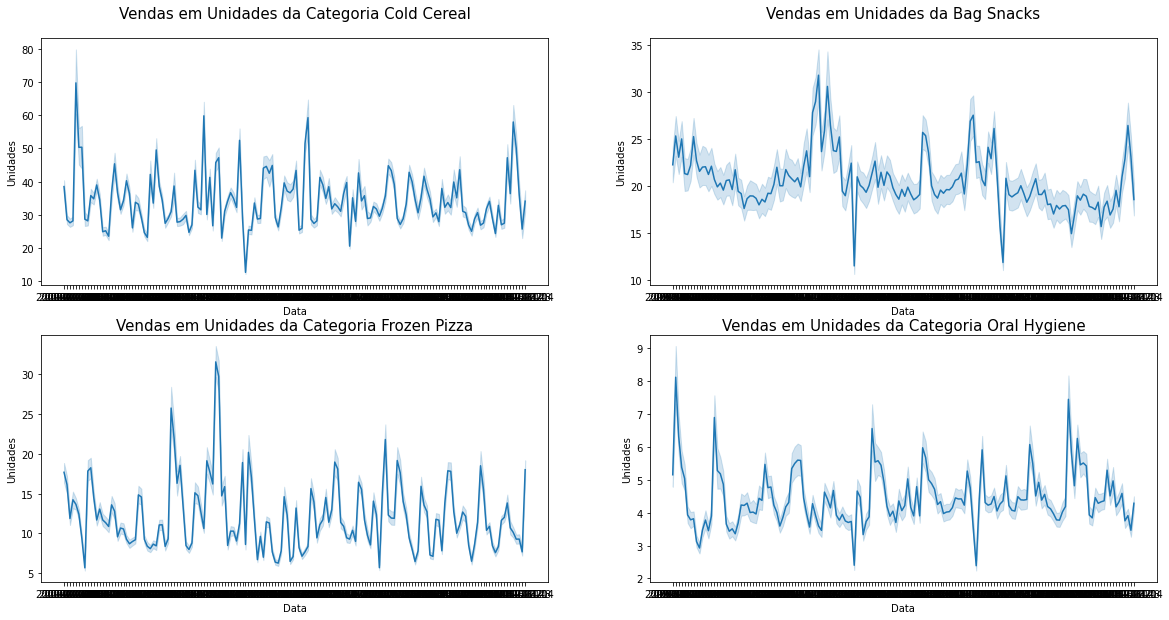

In [8]:
fig, eixo  = plt.subplots(2,2,figsize=(20,10))

z =tudo_junto.query("CATEGORY == 'COLD CEREAL' ")[['WEEK_END_DATE','UNITS',]].sort_values(by='WEEK_END_DATE')
sns.lineplot(x='WEEK_END_DATE',y='UNITS', data=z, ax=eixo[0,0])
eixo[0,0].set_title('Vendas em Unidades da Categoria Cold Cereal', fontsize=15, pad=20)
eixo[0,0].set_xlabel('Data', fontsize='10')
eixo[0,0].set_ylabel('Unidades', fontsize=10)

z =tudo_junto.query("CATEGORY == 'BAG SNACKS' ")[['WEEK_END_DATE','UNITS',]].sort_values(by='WEEK_END_DATE')
sns.lineplot(x='WEEK_END_DATE',y='UNITS', data=z, ax=eixo[0,1])
eixo[0,1].set_title('Vendas em Unidades da Bag Snacks', fontsize=15, pad=20)
eixo[0,1].set_xlabel('Data', fontsize='10')
eixo[0,1].set_ylabel('Unidades', fontsize=10)

z =tudo_junto.query("CATEGORY == 'FROZEN PIZZA' ")[['WEEK_END_DATE','UNITS',]].sort_values(by='WEEK_END_DATE')
sns.lineplot(x='WEEK_END_DATE',y='UNITS', data=z, ax=eixo[1,0])
eixo[1,0].set_title('Vendas em Unidades da Categoria Frozen Pizza', fontsize=15, pad=5)
eixo[1,0].set_xlabel('Data', fontsize='10')
eixo[1,0].set_ylabel('Unidades', fontsize=10)

z =tudo_junto.query("CATEGORY == 'ORAL HYGIENE PRODUCTS' ")[['WEEK_END_DATE','UNITS',]].sort_values(by='WEEK_END_DATE')
sns.lineplot(x='WEEK_END_DATE',y='UNITS', data=z, ax=eixo[1,1])
eixo[1,1].set_title('Vendas em Unidades da Categoria Oral Hygiene', fontsize=15, pad=5)
eixo[1,1].set_xlabel('Data', fontsize='10')
eixo[1,1].set_ylabel('Unidades', fontsize=10)

### **Visitas - Número de compras únicas que incluíram o produto**

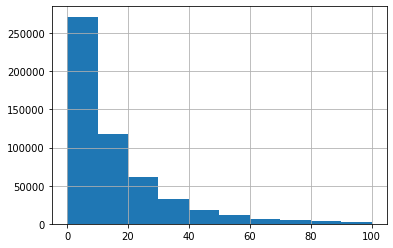

In [ ]:
tudo_junto.VISITS.hist(range=(0,100))

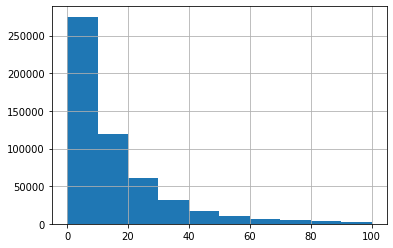

In [ ]:
tudo_junto.HHS.hist(range=(0,100))

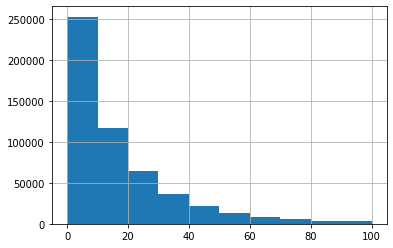

In [ ]:
tudo_junto.UNITS.hist(range=(0,100))

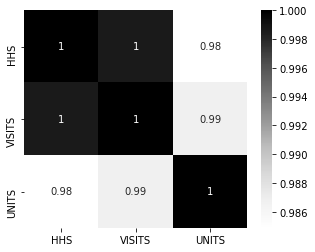

In [ ]:
fig, eixo  = plt.subplots(figsize=(5,4))
sns.heatmap(data=tudo_junto[['HHS','VISITS','UNITS']].corr(), annot=True,cmap='Greys')

### **Price e Base Price**
Base Price é o preço base, o mínimo que deveria ser cobrado pela venda de um produto.
Price o preço que a mercadoria foi vendida, não necessariamente é maior que o preço base.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff36c6b8c90>,
      dtype=object)

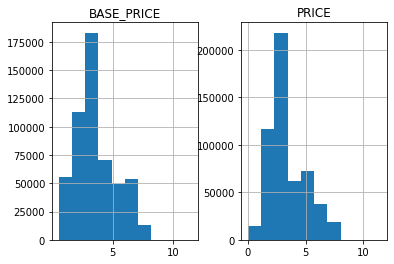

In [ ]:
tudo_junto[['BASE_PRICE','PRICE']].hist()

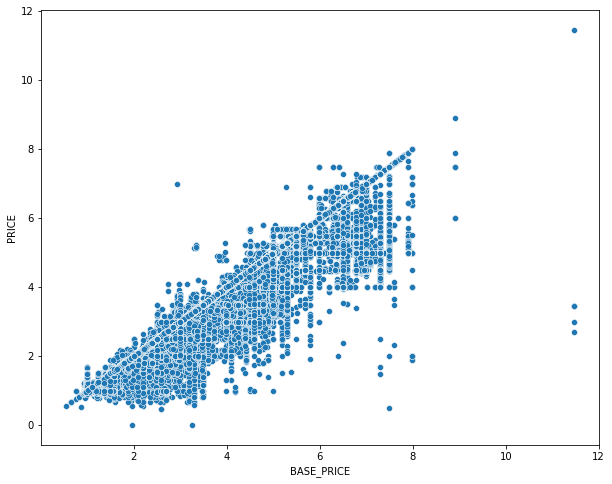

In [ ]:
fig, eixo  = plt.subplots(figsize=(10,8))
sns.scatterplot(x='BASE_PRICE', y='PRICE',data=tudo_junto)

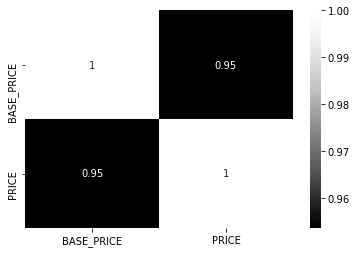

In [ ]:
sns.heatmap(data=tudo_junto[['BASE_PRICE','PRICE']].corr(), annot=True, cmap='Greys_r')

# **2- Receita**
Nesta seção faremos análises visuais em termos de receita.

## **Coluna Receita Base e Receita**


In [9]:
tudo_junto_rec = tudo_junto.copy()

In [10]:
tudo_junto_rec['RECEITA_BASE'] = tudo_junto.BASE_PRICE * tudo_junto.UNITS
tudo_junto_rec['RECEITA'] = tudo_junto.PRICE * tudo_junto.UNITS
tudo_junto_rec['WEEK_END_DATE'] = pd.to_datetime(tudo_junto_rec.WEEK_END_DATE)

tudo_junto_rec.to_csv('tudo_junto_receita.csv')

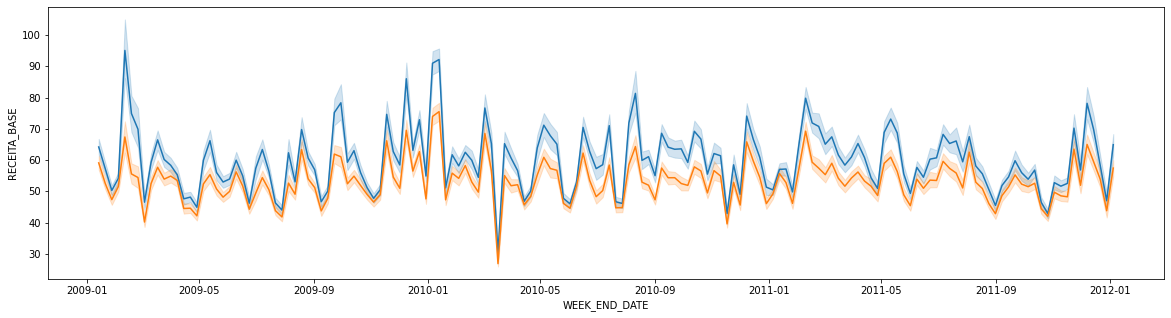

In [11]:
fig, eixo= plt.subplots(figsize=(20,5))
sns.lineplot(x='WEEK_END_DATE', y='RECEITA_BASE',data=tudo_junto_rec, markers=True)
sns.lineplot(x='WEEK_END_DATE', y='RECEITA',data=tudo_junto_rec)

## **Receita por ano**

In [12]:
print(f'Ano de inicio: {tudo_junto_rec.WEEK_END_DATE.dt.year.min()}, Último ano:{tudo_junto_rec.WEEK_END_DATE.dt.year.max()}')

Ano de inicio: 2009, Último ano:2012


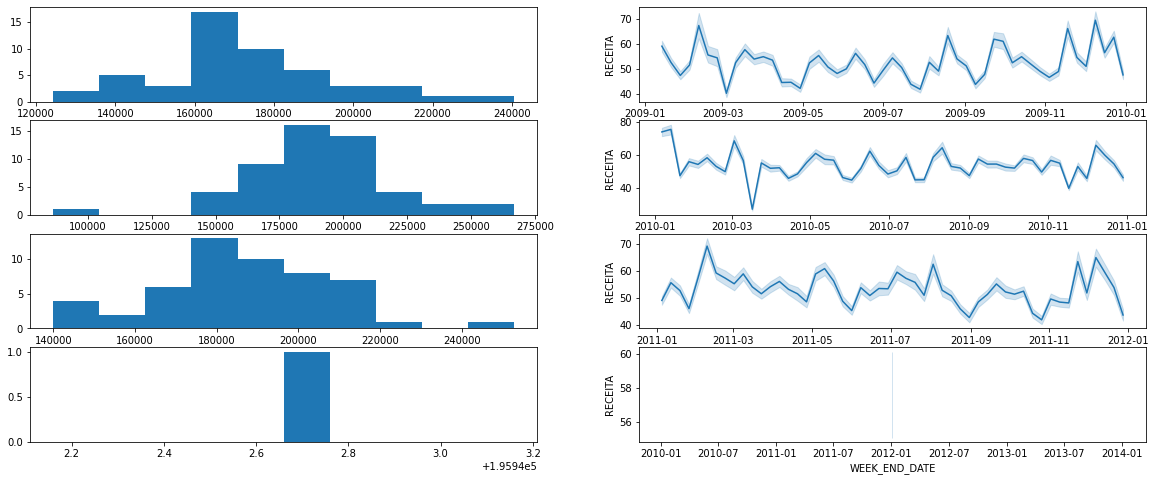

In [13]:
fig, eixo = plt.subplots(4,2,figsize=(20,8))

#2009
a = tudo_junto_rec.loc[(tudo_junto_rec.WEEK_END_DATE.dt.year == 2009)]
eixo[0,0].hist(x=a.groupby('WEEK_END_DATE')['RECEITA'].sum())
sns.lineplot(x='WEEK_END_DATE', y='RECEITA', data=a,ax=eixo[0,1])

#2010
a = tudo_junto_rec.loc[(tudo_junto_rec.WEEK_END_DATE.dt.year == 2010)]
eixo[1,0].hist(x=a.groupby('WEEK_END_DATE')['RECEITA'].sum())
sns.lineplot(x='WEEK_END_DATE', y='RECEITA', data=a, ax=eixo[1,1])

#2011
a = tudo_junto_rec.loc[(tudo_junto_rec.WEEK_END_DATE.dt.year == 2011)]
eixo[2,0].hist(x=a.groupby('WEEK_END_DATE')['RECEITA'].sum())
sns.lineplot(x='WEEK_END_DATE', y='RECEITA', data=a, ax=eixo[2,1])

#2012
a = tudo_junto_rec.loc[(tudo_junto_rec.WEEK_END_DATE.dt.year == 2012)]
eixo[3,0].hist(x=a.groupby('WEEK_END_DATE')['RECEITA'].sum())
sns.lineplot(x='WEEK_END_DATE', y='RECEITA', data=a, ax=eixo[3,1])


In [15]:
tudo_junto_rec[tudo_junto_rec.WEEK_END_DATE.dt.year == 2012].WEEK_END_DATE.dt.month_name().unique()


array(['January'], dtype=object)

O ano de 2012 só tem o mês de Janeiro na base de registros, por isso aparecem poucos dados nesse ano.

In [17]:
receitas_comparacao = pd.DataFrame()
receitas_comparacao['2009'] = [tudo_junto_rec[(tudo_junto_rec.WEEK_END_DATE.dt.year == 2009)]['RECEITA'].sum()]
receitas_comparacao['2010'] = tudo_junto_rec[(tudo_junto_rec.WEEK_END_DATE.dt.year == 2010)]['RECEITA'].sum()
receitas_comparacao['2011'] = tudo_junto_rec[(tudo_junto_rec.WEEK_END_DATE.dt.year == 2011)]['RECEITA'].sum()
receitas_comparacao = receitas_comparacao.T

Text(0.5, 0, 'Ano')

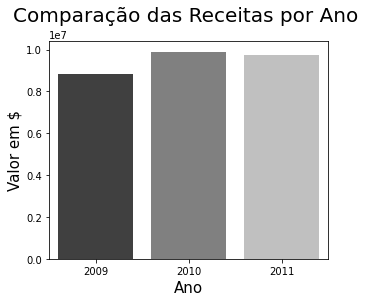

In [19]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x=receitas_comparacao.index,y=0,data=receitas_comparacao, palette='gray' )

ax.set_title("Comparação das Receitas por Ano ", fontsize=20,pad=20,)
ax.set_ylabel('Valor em $', fontsize=15)
ax.set_xlabel('Ano', fontsize=15)

##**Receita por tipo de loja**

Convencional, sofisticada ou Média

In [20]:
tudo_junto_rec.SEG_VALUE_NAME.unique()

array(['VALUE', 'UPSCALE', 'MAINSTREAM'], dtype=object)

### **Média**

In [21]:
rec_media= tudo_junto_rec[(tudo_junto.SEG_VALUE_NAME == 'VALUE')][['WEEK_END_DATE','RECEITA']]

Text(0.04, 0.5, 'Valor em U$')

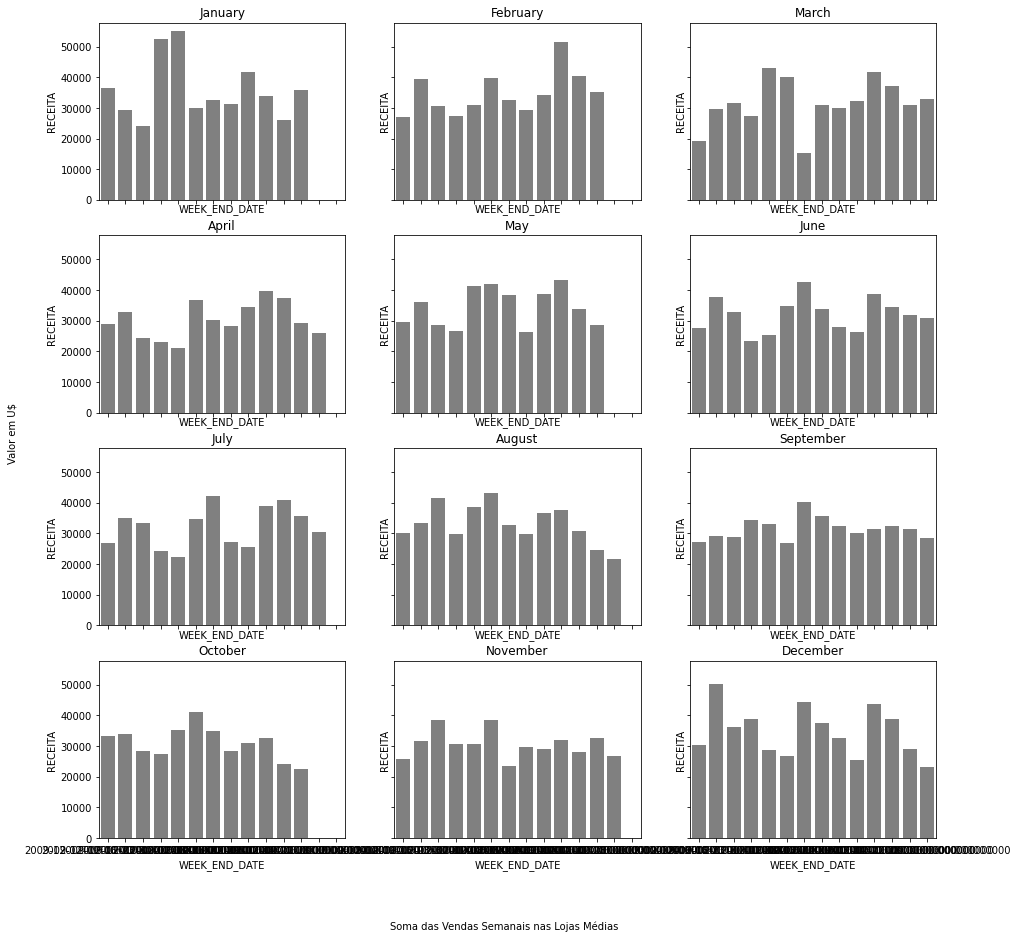

In [22]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
s, m = 1,1

for i in range(0,4):
  for j in range(0,3):
    a= rec_media.loc[rec_media.WEEK_END_DATE.dt.month == m]
    a= a.groupby('WEEK_END_DATE').sum().reset_index()
    sns.barplot(x='WEEK_END_DATE', y='RECEITA', data=a, ax=eixo[i,j], color='grey')
    eixo[i,j].set_title('%s'%calendar.month_name[m])

    m += 1

fig.text(0.5,0.04,'Soma das Vendas Semanais nas Lojas Médias', ha='center')
fig.text(0.04, 0.5, 'Valor em U$', va='center', rotation='vertical')

### **SOFISTICADA**

In [23]:
rec_sofisticada= tudo_junto_rec[(tudo_junto.SEG_VALUE_NAME == 'UPSCALE')][['WEEK_END_DATE','RECEITA']]

Text(0.04, 0.5, 'Valor em U$')

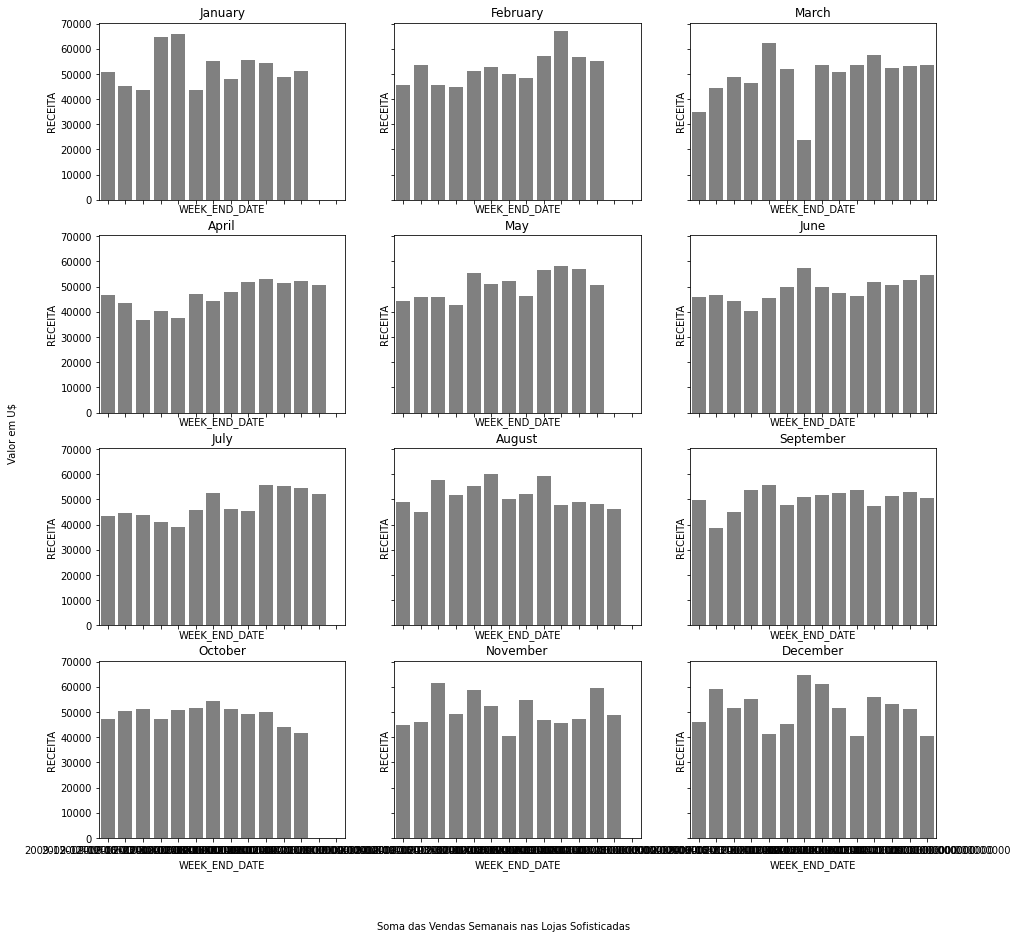

In [24]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
s, m = 1,1

for i in range(0,4):
  for j in range(0,3):
    a= rec_sofisticada.loc[rec_sofisticada.WEEK_END_DATE.dt.month == m]
    a= a.groupby('WEEK_END_DATE').sum().reset_index()
    sns.barplot(x='WEEK_END_DATE', y='RECEITA', data=a, ax=eixo[i,j], color='grey')
    eixo[i,j].set_title('%s'%calendar.month_name[m])

    m += 1

fig.text(0.5,0.04,'Soma das Vendas Semanais nas Lojas Sofisticadas', ha='center')
fig.text(0.04, 0.5, 'Valor em U$', va='center', rotation='vertical')

### **Convencional**

In [25]:
rec_convencional =rec_media= tudo_junto_rec[(tudo_junto.SEG_VALUE_NAME == 'MAINSTREAM')][['WEEK_END_DATE','RECEITA']]

Text(0.04, 0.5, 'Valor em U$')

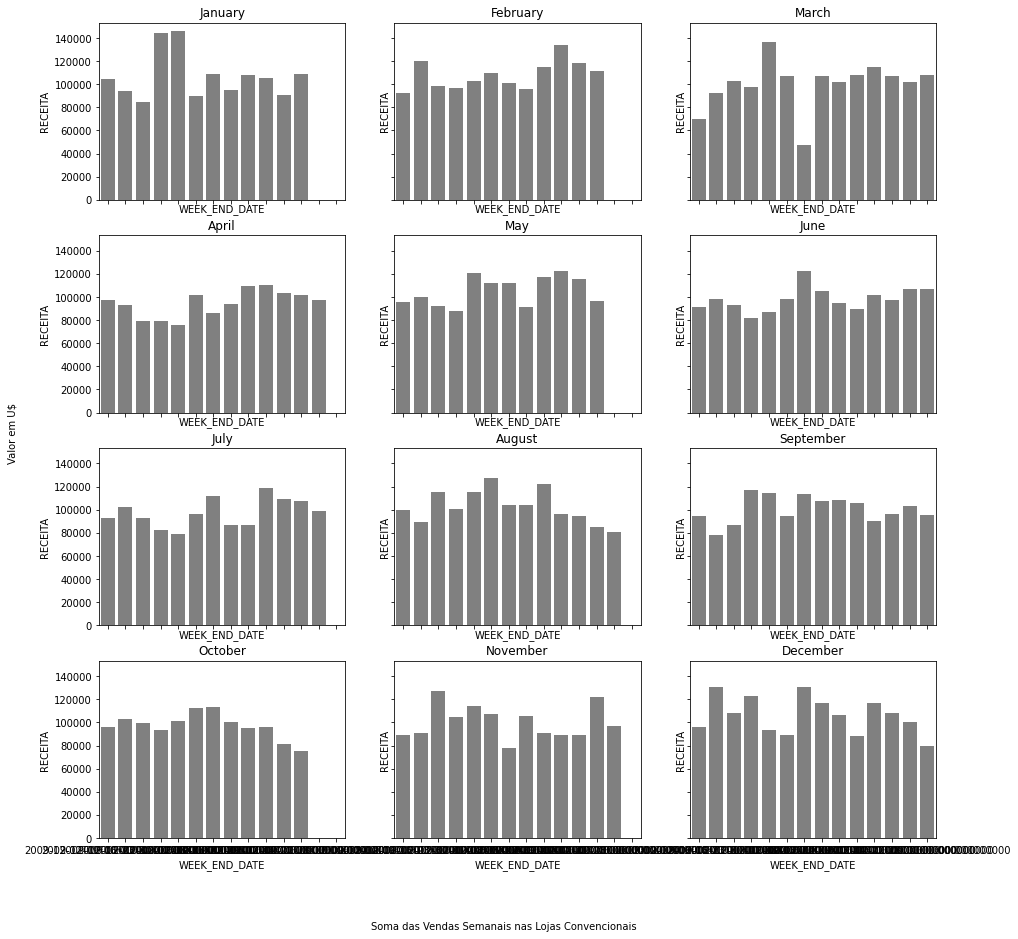

In [26]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
s, m = 1,1

for i in range(0,4):
  for j in range(0,3):
    a= rec_convencional.loc[rec_convencional.WEEK_END_DATE.dt.month == m]
    a= a.groupby('WEEK_END_DATE').sum().reset_index()
    sns.barplot(x='WEEK_END_DATE', y='RECEITA', data=a, ax=eixo[i,j], color='grey')
    eixo[i,j].set_title('%s'%calendar.month_name[m])

    m += 1

fig.text(0.5,0.04,'Soma das Vendas Semanais nas Lojas Convencionais', ha='center')
fig.text(0.04, 0.5, 'Valor em U$', va='center', rotation='vertical')

### **Comparação por tipo de loja**

In [27]:
rec_media[(rec_media.WEEK_END_DATE.dt.month == 1) & (rec_media.WEEK_END_DATE.dt.year == 2009)].sum()
rec_sofisticada[(rec_sofisticada.WEEK_END_DATE.dt.month == 1) & (rec_sofisticada.WEEK_END_DATE.dt.year == 2009)].sum()
rec_convencional[(rec_convencional.WEEK_END_DATE.dt.month == 1) & (rec_convencional.WEEK_END_DATE.dt.year == 2009)].sum()


RECEITA    282984.37
dtype: float64

Text(0.5, 0, 'Tipo de Loja')

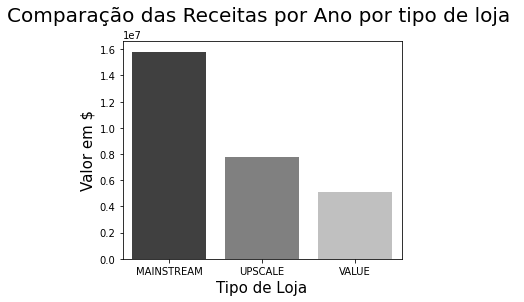

In [28]:
a= tudo_junto_rec.groupby('SEG_VALUE_NAME')['RECEITA'].sum().reset_index()

plt.figure(figsize=(5,4))
ax=sns.barplot(x="SEG_VALUE_NAME", y='RECEITA',data=a, palette='gray')

ax.set_title("Comparação das Receitas por Ano por tipo de loja ", fontsize=20,pad=20)
ax.set_ylabel('Valor em $', fontsize=15)
ax.set_xlabel('Tipo de Loja', fontsize=15)

#### **Sem o Filtro ano**

Text(0.04, 0.5, 'Valor em U$')

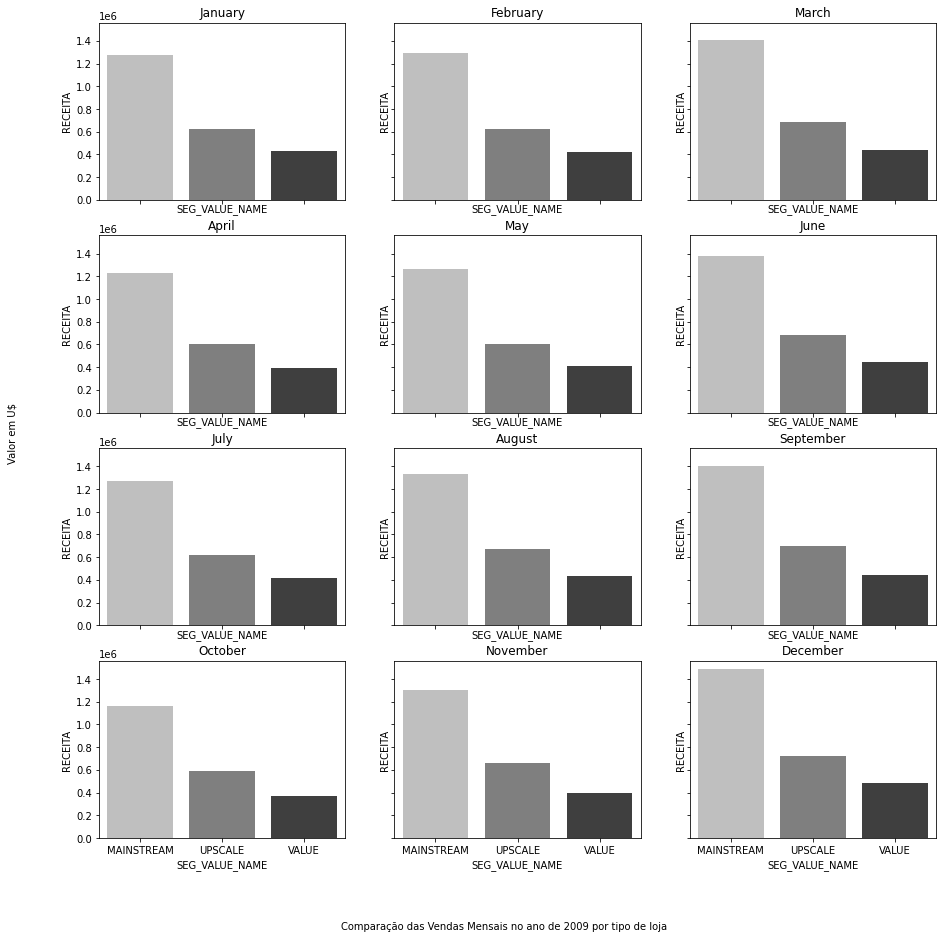

In [ ]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
m, ano = 1,2009 # pode alterar o ano se quiser saber de outros anos

for i in range(0,4):
  for j in range(0,3):
    a= tudo_junto_rec[['WEEK_END_DATE','SEG_VALUE_NAME','RECEITA']]
    a = a[(a.WEEK_END_DATE.dt.month == m)]
    a = a.groupby('SEG_VALUE_NAME')['RECEITA'].sum().reset_index()

    sns.barplot(x="SEG_VALUE_NAME", y='RECEITA', data=a, palette= 'gray_r', ax=eixo[i,j])

    eixo[i,j].set_title('%s'%calendar.month_name[m])

    m += 1

fig.text(0.5,0.04,'Comparação das Vendas Mensais no ano de 2009 por tipo de loja', ha='center')
fig.text(0.04, 0.5, 'Valor em U$', va='center', rotation='vertical')

#### **Com o filtro ano**

Text(0.04, 0.5, 'Valor em U$')

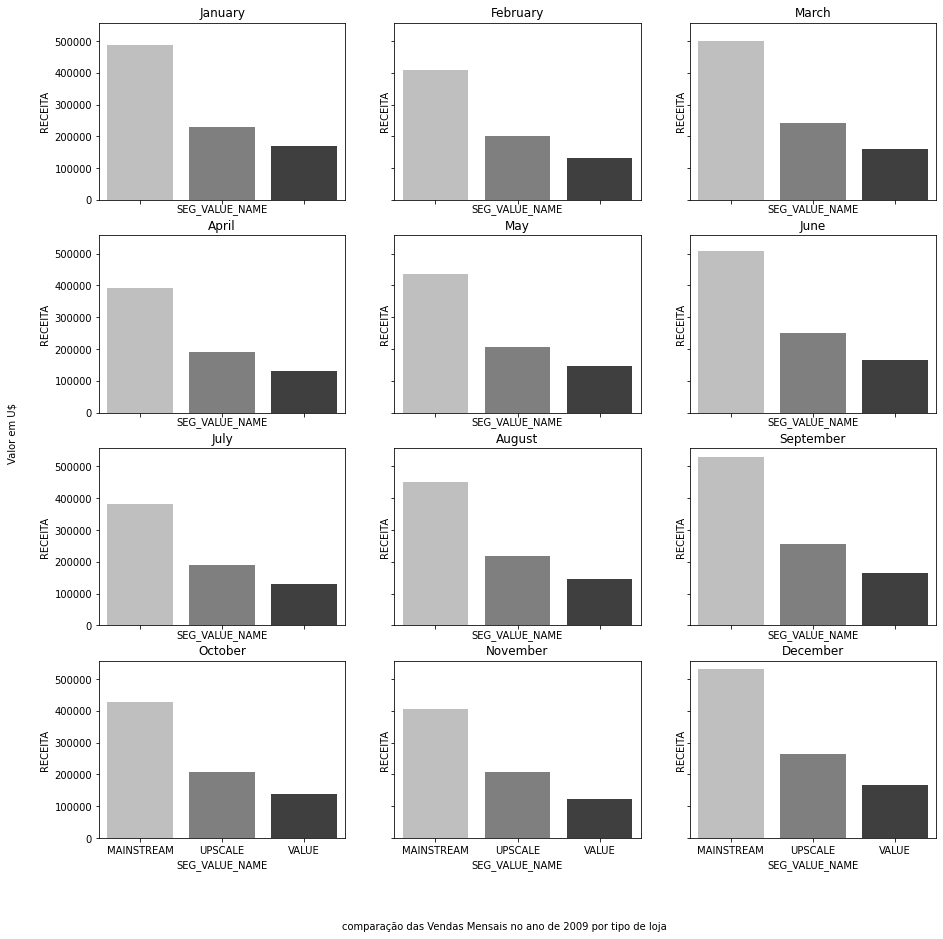

In [ ]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
m, ano = 1,2009 # pode alterar o ano se quiser saber de outros anos

for i in range(0,4):
  for j in range(0,3):
    a= tudo_junto_rec[['WEEK_END_DATE','SEG_VALUE_NAME','RECEITA']]
    a = a[(a.WEEK_END_DATE.dt.month == m) & (a.WEEK_END_DATE.dt.year == ano)]
    a = a.groupby('SEG_VALUE_NAME')['RECEITA'].sum().reset_index()

    sns.barplot(x="SEG_VALUE_NAME", y='RECEITA', data=a, palette= 'gray_r', ax=eixo[i,j])

    eixo[i,j].set_title('%s'%calendar.month_name[m])

    m += 1

fig.text(0.5,0.04,'Comparação das Vendas Mensais no ano de 2009 por tipo de loja', ha='center')
fig.text(0.04, 0.5, 'Valor em U$', va='center', rotation='vertical')

#### A proporção de lojas não é a mesma. Quais tipos de loja trazem melhor resultado por unidade?

In [ ]:
#Quantidade de lojas por tipo
tipo_de_loja = lojas.SEG_VALUE_NAME.value_counts().reset_index()
tipo_de_loja.rename(columns={'index': 'SEG_VALUE_NAME',"SEG_VALUE_NAME":'QUANTIDADE'}, inplace=True)
tipo_de_loja

,SEG_VALUE_NAME,QUANTIDADE
0,MAINSTREAM,43
1,VALUE,19
2,UPSCALE,17


In [ ]:
 a= tudo_junto_rec[['WEEK_END_DATE','SEG_VALUE_NAME','RECEITA']]

 a[(a.WEEK_END_DATE.dt.year == ano) & (a.WEEK_END_DATE.dt.month == m)]

 a = a.groupby('SEG_VALUE_NAME')['RECEITA'].sum().reset_index()

 a = pd.merge(a,tipo_de_loja,how='inner', on='SEG_VALUE_NAME')

 a['RECEITA_POR_UNIDADE'] = a.RECEITA/a.QUANTIDADE
 a

,SEG_VALUE_NAME,RECEITA,QUANTIDADE,RECEITA_POR_UNIDADE
0,MAINSTREAM,1.581433e+07,43,367775.017674
1,UPSCALE,7.790324e+06,17,458254.329412
2,VALUE,5.090707e+06,19,267931.947368


Text(0.04, 0.5, 'Valor em U$')

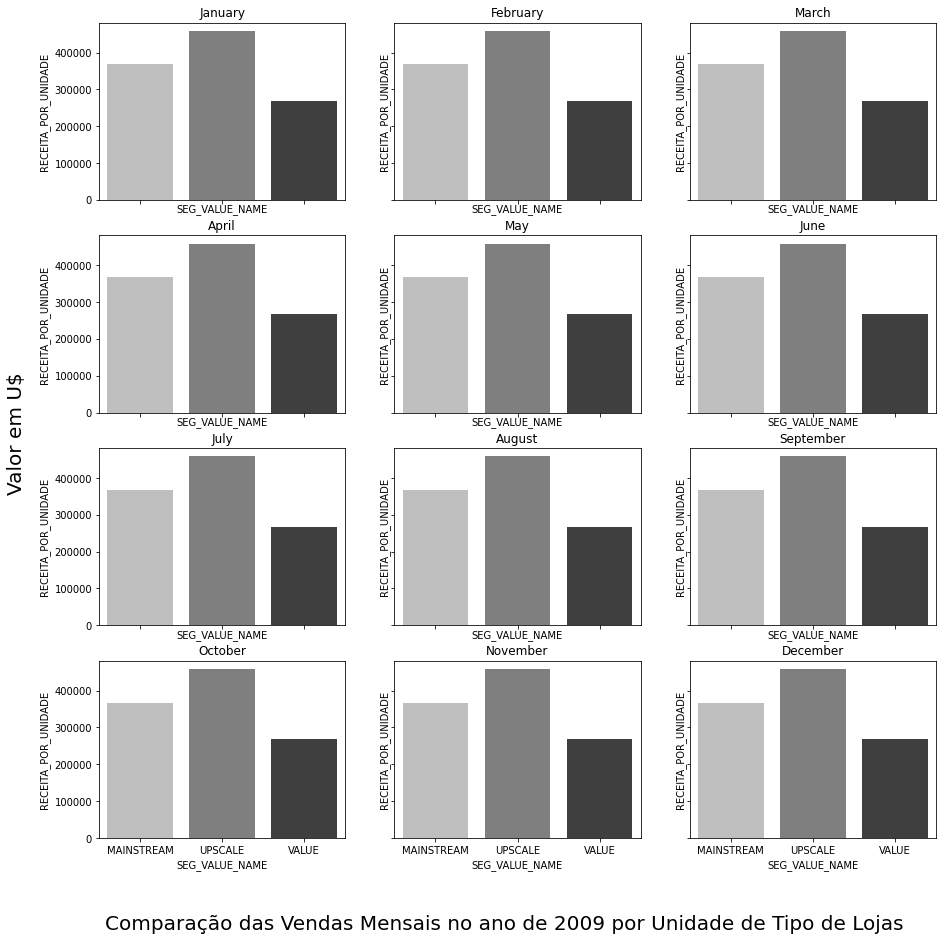

In [ ]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
m, ano = 1,2010 # pode alterar o ano se quiser saber de outros anos

for i in range(0,4):
  for j in range(0,3):

     a= tudo_junto_rec[['WEEK_END_DATE','SEG_VALUE_NAME','RECEITA']]
     a[(a.WEEK_END_DATE.dt.year == ano) & (a.WEEK_END_DATE.dt.month == m)]
     a = a.groupby('SEG_VALUE_NAME')['RECEITA'].sum().reset_index()
     a = pd.merge(a,tipo_de_loja,how='inner', on='SEG_VALUE_NAME')
     a['RECEITA_POR_UNIDADE'] = a.RECEITA/a.QUANTIDADE

     sns.barplot(x="SEG_VALUE_NAME", y='RECEITA_POR_UNIDADE', data=a, palette= 'gray_r', ax=eixo[i,j])

     eixo[i,j].set_title('%s'%calendar.month_name[m])
     #eixo[i,j].set_xticklabels(['Convencional', 'Média','Sofisticada'], fontsize=12)

     m += 1

fig.text(0.5,0.04,'Comparação das Vendas Mensais no ano de 2009 por Unidade de Tipo de Lojas', ha='center', fontsize= 20)
fig.text(0.04, 0.5, 'Valor em U$', va='center', rotation='vertical', fontsize= 20)

Visualmente as lojas sofisticadas possuem maior receita por unidade.

### **Receita por cada loja**

In [ ]:
tudo_junto_rec.STORE_ID.unique()

array([  367,   387,   389,   613,   623,  2277,  2279,  2281,  2495,
        2505,  2513,  2523,  2541,  4245,  4259,  4489,  4503,  4521,
        6179,  6187,  6379,  6431,  8035,  8041,  8263,  9825, 10019,
       11757, 11761, 11967, 11993, 12011, 13609, 13827, 13837, 13853,
       13859, 15531, 15541, 15547, 15755, 15763, 15765, 17599, 17615,
       17627, 19265, 19521, 19523, 19533, 21213, 21221, 21227, 21237,
       21479, 21485, 23055, 23061, 23067, 23075, 23327, 23345, 23349,
       24991, 25001, 25021, 25027, 25229, 25233, 25253, 25261, 26973,
       26981, 26983, 27175, 28909, 29159])

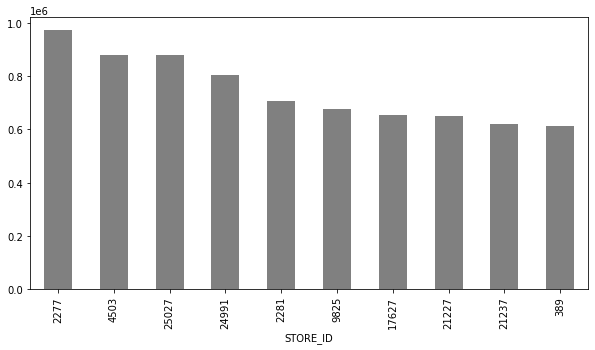

In [ ]:
# top 10 Receitas das lojas nos 3 anos, com filtro consegue-se qualquer período em qualquer tempo.

tudo_junto_rec.groupby('STORE_ID')['RECEITA'].sum().sort_values(ascending=False)[0:10].plot(kind='bar', figsize=(10,5), color='grey')

In [ ]:
#Receita de qualquer loja ao longo de  1 no
loja, ano, m = 2277, 2009, 1

a= tudo_junto_rec[(tudo_junto_rec.STORE_ID == loja) & (tudo_junto_rec.WEEK_END_DATE.dt.year == ano) & (tudo_junto_rec.WEEK_END_DATE.dt.month == m)]
a = a.groupby("WEEK_END_DATE")['RECEITA'].sum().reset_index()
a

,WEEK_END_DATE,RECEITA
0,2009-01-14,6559.58
1,2009-01-21,5408.82
2,2009-01-28,5512.08


Text(0.04, 0.5, 'Valor em U$')

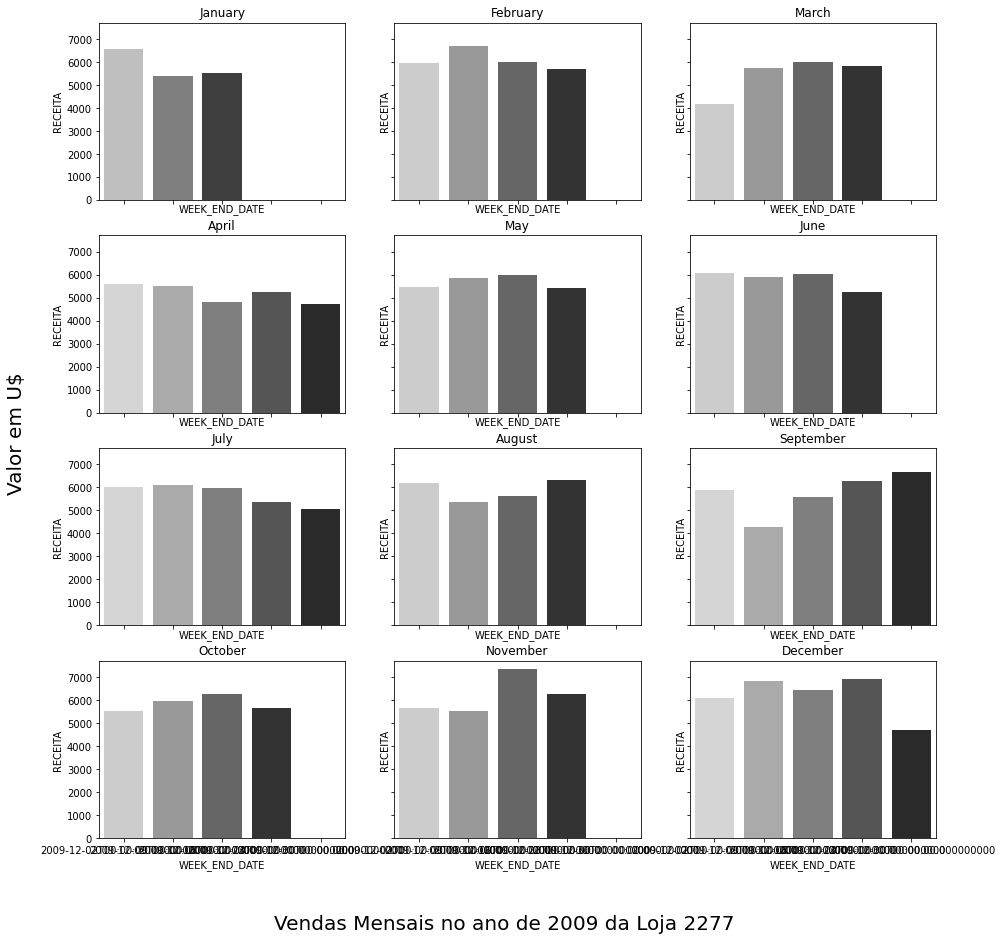

In [ ]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
loja, ano, m = 2277, 2009, 1 # pode alterar o ano e a loja

for i in range(0,4):
  for j in range(0,3):

     a= tudo_junto_rec[(tudo_junto_rec.STORE_ID == loja) & (tudo_junto_rec.WEEK_END_DATE.dt.year == ano) & (tudo_junto_rec.WEEK_END_DATE.dt.month == m)]
     a = a.groupby("WEEK_END_DATE")['RECEITA'].sum().reset_index()

     sns.barplot(x="WEEK_END_DATE", y='RECEITA', data=a, palette= 'gray_r', ax=eixo[i,j])

     eixo[i,j].set_title('%s'%calendar.month_name[m])     
     m += 1

fig.text(0.5,0.04,'Vendas Mensais no ano de 2009 da Loja 2277', ha='center', fontsize= 20)
fig.text(0.04, 0.5, 'Valor em U$', va='center', rotation='vertical', fontsize= 20)

## **Receita por estado**

In [ ]:
lojas.ADDRESS_STATE_PROV_CODE.unique()

array(['KY', 'OH', 'TX', 'IN'], dtype=object)

Text(0.5, 0, 'Estados')

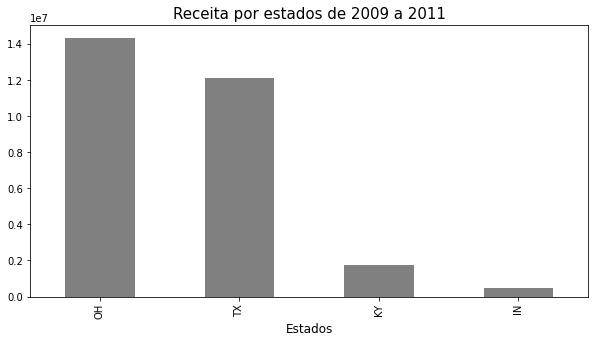

In [ ]:
tudo_junto_rec.groupby('ADDRESS_STATE_PROV_CODE')['RECEITA'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='grey')
plt.title('Receita por estados de 2009 a 2011', fontsize=15)
plt.xlabel('Estados', fontsize=12)

In [ ]:
a = tudo_junto_rec[(tudo_junto_rec['WEEK_END_DATE'].dt.year == 2009) & (tudo_junto_rec['WEEK_END_DATE'].dt.month == 12)]
a.groupby('ADDRESS_STATE_PROV_CODE')['RECEITA'].sum().reset_index()

,ADDRESS_STATE_PROV_CODE,RECEITA
0,IN,15311.04
1,KY,59426.37
2,OH,489336.63
3,TX,425225.34


Text(0.04, 0.5, 'Valor em U$')

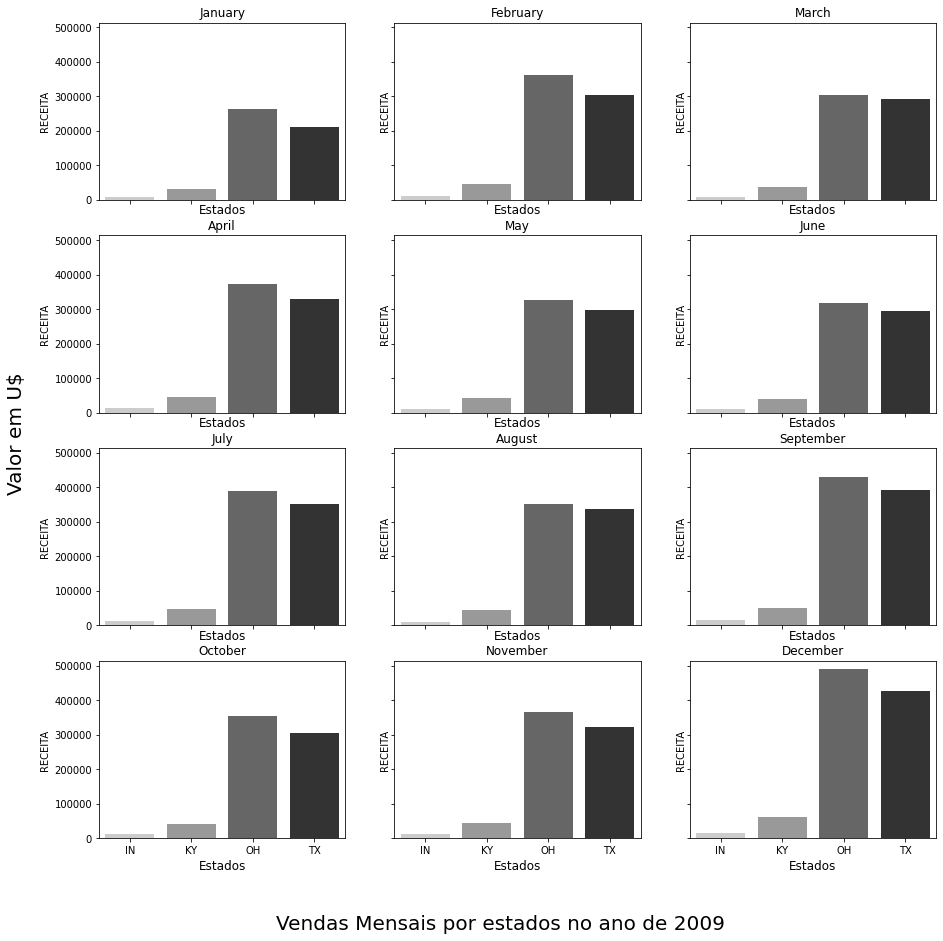

In [ ]:
#Receita por mês em cada estado dado o ano

fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
ano, m = 2009, 1 # pode alterar o ano e a loja

for i in range(0,4):
  for j in range(0,3):

     a= tudo_junto_rec[(tudo_junto_rec.WEEK_END_DATE.dt.year == ano) & (tudo_junto_rec.WEEK_END_DATE.dt.month == m)]
     a = a.groupby("ADDRESS_STATE_PROV_CODE")['RECEITA'].sum().reset_index()

     sns.barplot(x="ADDRESS_STATE_PROV_CODE", y='RECEITA', data=a, palette= 'gray_r', ax=eixo[i,j])

     eixo[i,j].set_title('%s'%calendar.month_name[m])
     eixo[i,j].set_xlabel('Estados', fontsize=12)  
     m += 1

fig.text(0.5,0.04,'Vendas Mensais por estados no ano de 2009 ', ha='center', fontsize= 20)
fig.text(0.04, 0.5, 'Valor em U$', va='center', rotation='vertical', fontsize= 20)



In [ ]:
lojas.ADDRESS_CITY_NAME.unique()

array(['ERLANGER', 'CINCINNATI', 'KINGWOOD', 'BAYTOWN', 'RICHARDSON',
       'MCKINNEY', 'PASADENA', 'HOUSTON', 'FRISCO', 'DAYTON', 'ARLINGTON',
       'SUGAR LAND', 'VANDALIA', 'GOSHEN', 'MESQUITE', 'COVINGTON',
       'KATY', 'SPRINGFIELD', 'ROCKWALL', 'DUNCANVILLE', 'DENTON',
       'HAMILTON', 'DICKINSON', 'SAINT MARYS', 'MAINEVILLE', 'MAGNOLIA',
       'CARROLLTON', 'FLOWER MOUND', 'ALLEN', 'GRAND PRAIRIE',
       'INDEPENDENCE', 'SHERMAN', 'MIDDLETOWN', 'LEBANON', 'WEST CHESTER',
       'GARLAND', 'CYPRESS', 'LAWRENCEBURG', 'DALLAS', 'CROWLEY',
       'BLUE ASH', 'CLUTE', 'COLLEGE STATION', 'THE WOODLANDS',
       'KETTERING', 'MILFORD', 'MASON', 'LOVELAND', 'BEAUMONT',
       'WOODLANDS', 'SOUTHLAKE'], dtype=object)

Text(0.5, 0, 'Cidades')

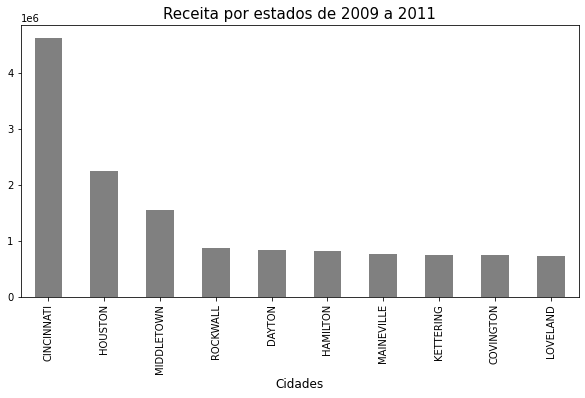

In [ ]:
#Vendas por cidade nos 3 Anos
tudo_junto_rec.groupby('ADDRESS_CITY_NAME')['RECEITA'].sum().sort_values(ascending=False)[0:10].plot(kind='bar', figsize=(10,5), color='grey')
plt.title('Receita por estados de 2009 a 2011', fontsize=15)
plt.xlabel('Cidades', fontsize=12)

In [ ]:
#A cidade de Cicinati tem receita 2X maior que a segunda em receita. Há mais lojas em Cicinati?
tudo_junto_rec[tudo_junto_rec.ADDRESS_CITY_NAME == 'HOUSTON']['STORE_ID'].value_counts().reset_index()

,index,STORE_ID
0,2513,7109
1,623,6878
2,15765,6782
3,23327,6466
4,21479,6290
5,25233,6183
6,10019,5477
7,11967,5104


In [ ]:
tudo_junto_rec[tudo_junto_rec.ADDRESS_CITY_NAME == 'CINCINNATI']['STORE_ID'].value_counts().reset_index()

,index,STORE_ID
0,2277,8045
1,24991,8007
2,25027,7934
3,9825,7861
4,15547,7615
5,21213,7476
6,4259,6959
7,23055,4723
8,8035,4119


O Número de lojas é de 7 em Houston e 8 em Cincinati. Provavelmente a diferença no faturamento se deve a outros fatores.

## **Receita por Produto**

In [ ]:
tudo_junto_rec.DESCRIPTION.unique()

array(['PL MINI TWIST PRETZELS', 'PL PRETZEL STICKS', 'PL TWIST PRETZELS',
       'PL BL MINT ANTSPTC RINSE', 'PL ANTSPTC SPG MNT MTHWS',
       'PL HONEY NUT TOASTD OATS', 'PL RAISIN BRAN',
       'PL BT SZ FRSTD SHRD WHT', 'PL SR CRUST SUPRM PIZZA',
       'PL SR CRUST 3 MEAT PIZZA', 'PL SR CRUST PEPPRN PIZZA',
       'GM HONEY NUT CHEERIOS', 'GM CHEERIOS', 'RLDGLD TINY TWISTS PRTZL',
       'QKER LIFE ORIGINAL', 'QKER CAP N CRUNCH BERRIES',
       'QKER CAP N CRUNCH', 'CREST PH WHTG CLN MINT TP',
       'CREST PH CLN MINT RINSE', 'KELL BITE SIZE MINI WHEAT',
       'KELL FROSTED FLAKES', 'KELL FROOT LOOPS',
       'ACT MINT A/CAV FLUOR RNS', 'SHURGD MINI PRETZELS',
       'SHURGD PRETZEL STICKS', 'DIGIORNO THREE MEAT',
       'DIGRN SUPREME PIZZA', 'DIGRN PEPP PIZZA',
       'FRSC BRCK OVN ITL PEP PZ', 'FRSC PEPPERONI PIZZA',
       'FRSC 4 CHEESE PIZZA', 'SNYDR SOURDOUGH NIBBLERS',
       'SNYDR FF MINI PRETZELS', 'LSTRNE FRS BRST ANTSPC MW',
       'RLDGLD BRAIDED HONEY WHT', 'RLD

Text(0.5, 0, 'Produtos')

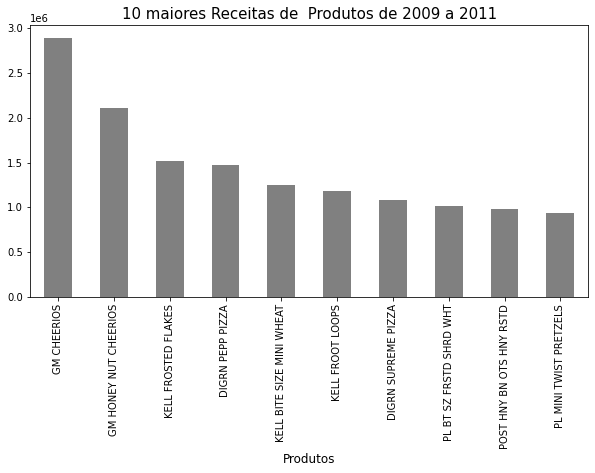

In [ ]:
#Vendas por cidade nos 3 Anos
tudo_junto_rec.groupby('DESCRIPTION')['RECEITA'].sum().sort_values(ascending=False)[0:10].plot(kind='bar', figsize=(10,5), color='grey')
plt.title( '10 maiores Receitas de  Produtos de 2009 a 2011', fontsize=15)
plt.xlabel('Produtos', fontsize=12)

Text(0.04, 0.5, 'Valor em U$')

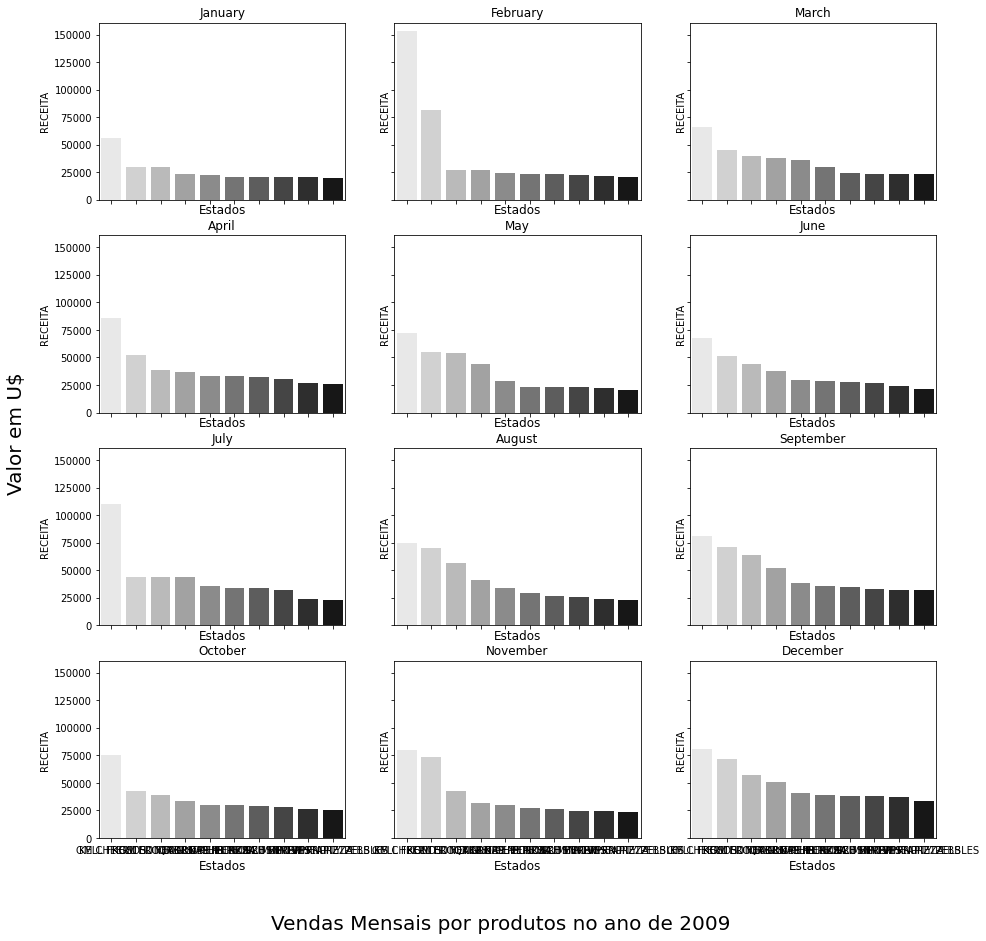

In [ ]:
#Receita por mês de Produtos

fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
ano, m = 2009, 1 # pode alterar o ano e a loja

for i in range(0,4):
  for j in range(0,3):

     a= tudo_junto_rec[(tudo_junto_rec.WEEK_END_DATE.dt.year == ano) & (tudo_junto_rec.WEEK_END_DATE.dt.month == m)]
     a = a.groupby("DESCRIPTION")['RECEITA'].sum().reset_index().sort_values(by='RECEITA',ascending=False)

     sns.barplot(x="DESCRIPTION", y='RECEITA', data=a[0:10], palette= 'gray_r', ax=eixo[i,j])

     eixo[i,j].set_title('%s'%calendar.month_name[m])
     eixo[i,j].set_xlabel('Estados', fontsize=12)  
     m += 1

fig.text(0.5,0.04,'Vendas Mensais por produtos no ano de 2009 ', ha='center', fontsize= 20)
fig.text(0.04, 0.5, 'Valor em U$', va='center', rotation='vertical', fontsize= 20)

# **3- Lucro Bruto**

Nesta seção vamos calcular o lucro descontando 'SPEND' da 'RECEITA' para lojas, produtos, ano e tipos de lojas.

## **Lucro Bruto**

In [53]:
 tudo_junto_rec = pd.read_csv('/content/drive/MyDrive/Portfólio/dunnhumby _Breakfast-at-the-Frat/tudo_junto_receita.csv')
tudo_junto_luc= tudo_junto_rec.copy()

In [31]:
tudo_junto_luc['WEEK_END_DATE'] = pd.to_datetime(tudo_junto_luc.WEEK_END_DATE)

In [32]:
tudo_junto_luc['LUCRO_BRUTO'] = tudo_junto_luc.RECEITA - tudo_junto_luc.SPEND
tudo_junto_luc.to_csv('tudo_junto_lucro+receita.csv')

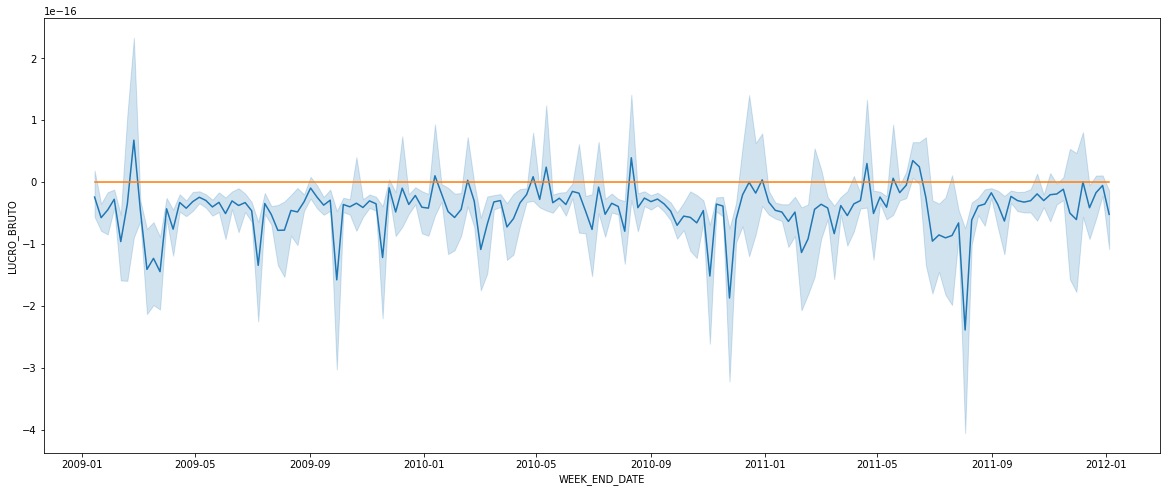

In [33]:
plt.figure(figsize=(20,8))

sns.lineplot(x='WEEK_END_DATE', y='LUCRO_BRUTO', data=tudo_junto_luc)
sns.lineplot(x='WEEK_END_DATE', y=0, data=tudo_junto_luc)

Visualmente notamos que na maioria dos meses a empresa tem prejuízo.
Vamos analisar as diferenças entre o preço base e o preço cobrado na gôndola.

In [ ]:
analise_preços = tudo_junto_luc[['WEEK_END_DATE','SPEND','UNITS','BASE_PRICE','PRICE']]
analise_preços['SPEND/UNITS'] = analise_preços.SPEND/analise_preços.UNITS
analise_preços['DIFERENÇA'] = (analise_preços.PRICE - analise_preços['SPEND/UNITS'])
analise_preços

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,WEEK_END_DATE,SPEND,UNITS,BASE_PRICE,PRICE,SPEND/UNITS,DIFERENÇA
0,2009-01-14,18.07,13,1.57,1.39,1.39,-2.220446e-16
1,2009-01-21,33.36,24,1.57,1.39,1.39,0.000000e+00
2,2009-01-28,9.52,7,1.36,1.36,1.36,2.220446e-16
3,2009-02-04,16.56,12,1.38,1.38,1.38,0.000000e+00
4,2009-02-11,24.00,16,1.50,1.50,1.50,0.000000e+00
...,...,...,...,...,...,...,...
538638,2011-11-02,11.98,2,5.99,5.99,5.99,0.000000e+00
538639,2011-11-16,19.47,3,6.49,6.49,6.49,8.881784e-16
538640,2011-11-23,25.96,4,6.49,6.49,6.49,0.000000e+00
538641,2011-12-07,12.98,2,6.49,6.49,6.49,0.000000e+00


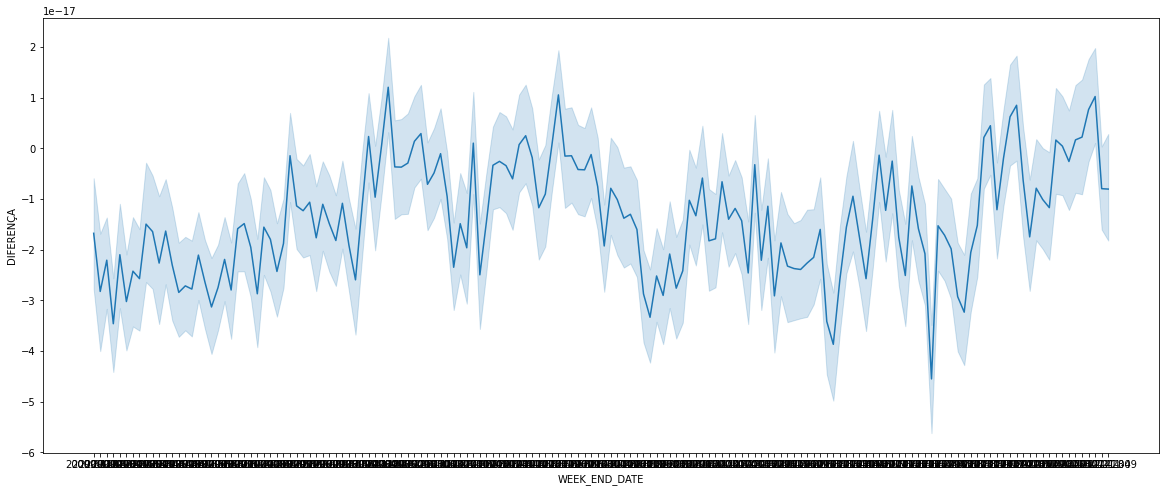

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='WEEK_END_DATE',y='DIFERENÇA',data=analise_preços)

## Lucro por Ano

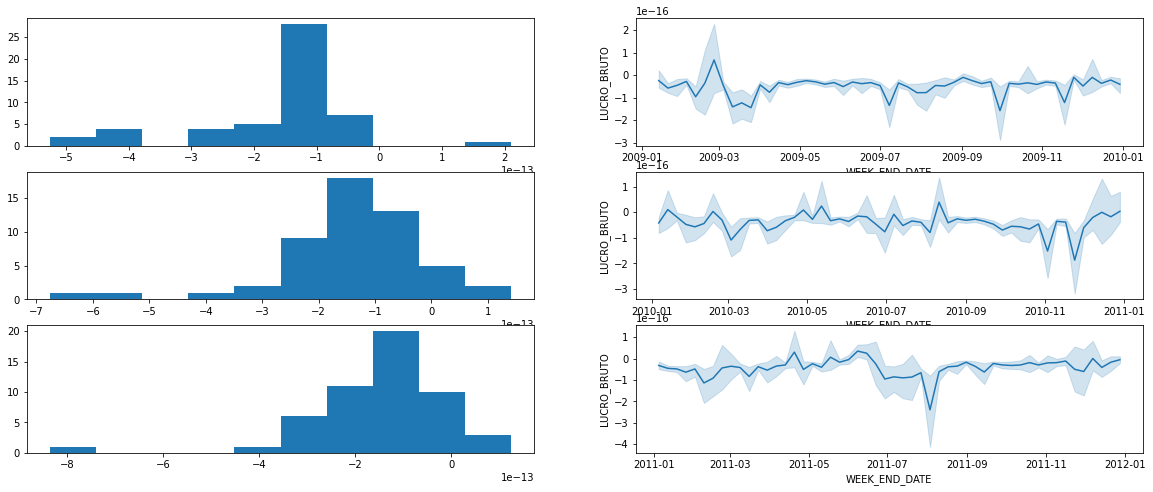

In [ ]:
fig, eixo = plt.subplots(3,2,figsize=(20,8))

#2009
a = tudo_junto_luc.loc[(tudo_junto_luc.WEEK_END_DATE.dt.year == 2009)]
eixo[0,0].hist(x=a.groupby('WEEK_END_DATE')['LUCRO_BRUTO'].sum())
sns.lineplot(x='WEEK_END_DATE', y='LUCRO_BRUTO', data=a,ax=eixo[0,1])

#2010
a = tudo_junto_luc.loc[(tudo_junto_luc.WEEK_END_DATE.dt.year == 2010)]
eixo[1,0].hist(x=a.groupby('WEEK_END_DATE')['LUCRO_BRUTO'].sum())
sns.lineplot(x='WEEK_END_DATE', y='LUCRO_BRUTO', data=a, ax=eixo[1,1])

#2011
a = tudo_junto_luc.loc[(tudo_junto_luc.WEEK_END_DATE.dt.year == 2011)]
eixo[2,0].hist(x=a.groupby('WEEK_END_DATE')['LUCRO_BRUTO'].sum())
sns.lineplot(x='WEEK_END_DATE', y='LUCRO_BRUTO', data=a, ax=eixo[2,1])

In [ ]:
lucro_comparacao = pd.DataFrame()
lucro_comparacao['2009'] = [tudo_junto_luc[(tudo_junto_luc.WEEK_END_DATE.dt.year == 2009)]['LUCRO_BRUTO'].sum()]
lucro_comparacao['2010'] = tudo_junto_luc[(tudo_junto_luc.WEEK_END_DATE.dt.year == 2010)]['LUCRO_BRUTO'].sum()
lucro_comparacao['2011'] = tudo_junto_luc[(tudo_junto_luc.WEEK_END_DATE.dt.year == 2011)]['LUCRO_BRUTO'].sum()
lucro_comparacao = lucro_comparacao.T
lucro_comparacao

,0
2009,-8.210321e-12
2010,-7.383427e-12
2011,-7.681855e-12


Text(0.5, 0, 'Ano')

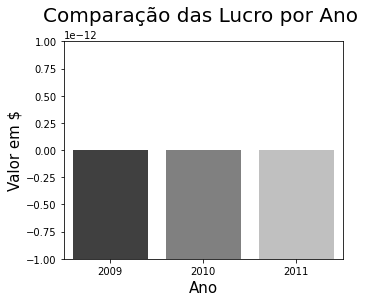

In [ ]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x=lucro_comparacao.index,y=0,data=lucro_comparacao, palette='gray' )

ax.set_title("Comparação das Lucro por Ano ", fontsize=20,pad=20,)
ax.set_ylabel('Valor em $', fontsize=15)
ax.set_xlabel('Ano', fontsize=15)

## Aumentando o preço em 5%,10% e 20%.

What is the price elasticity of the
products? What will happen to
unit sales if the price changes
by X%?

In [ ]:
tudo_junto_luc['PRICE5'] = tudo_junto_luc.PRICE * 1.05
tudo_junto_luc['PRICE10'] = tudo_junto_luc.PRICE * 1.10
tudo_junto_luc['PRICE20'] = tudo_junto_luc.PRICE * 1.20

In [ ]:
#Recalculando a receita

tudo_junto_luc['R5'] = tudo_junto_luc.UNITS * tudo_junto_luc.PRICE5
tudo_junto_luc['R10'] = tudo_junto_luc.UNITS * tudo_junto_luc.PRICE10
tudo_junto_luc['R20'] = tudo_junto_luc.UNITS * tudo_junto_luc.PRICE20

In [ ]:
#Calculando o lucro
tudo_junto_luc['LB5'] = tudo_junto_luc.R5 - tudo_junto_luc.SPEND
tudo_junto_luc['LB10'] = tudo_junto_luc.R10 - tudo_junto_luc.SPEND
tudo_junto_luc['LB20'] = tudo_junto_luc.R20 - tudo_junto_luc.SPEND

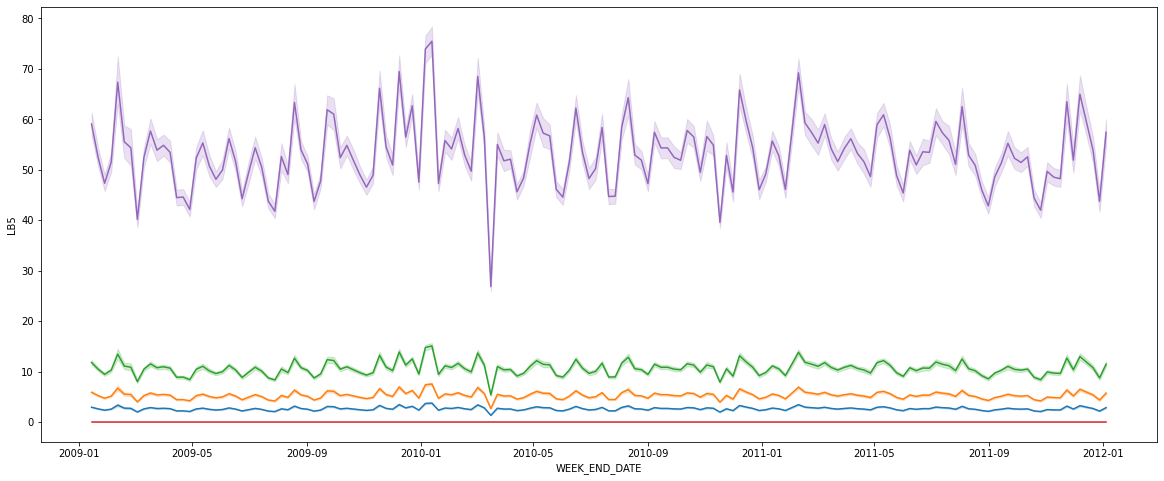

In [ ]:
plt.figure(figsize=(20,8))

sns.lineplot(x='WEEK_END_DATE', y='LB5', data=tudo_junto_luc)
sns.lineplot(x='WEEK_END_DATE', y='LB10', data=tudo_junto_luc)
sns.lineplot(x='WEEK_END_DATE', y='LB20', data=tudo_junto_luc)
sns.lineplot(x='WEEK_END_DATE', y='LUCRO_BRUTO', data=tudo_junto_luc)
sns.lineplot(x='WEEK_END_DATE', y='SPEND', data=tudo_junto_luc)

In [ ]:
#Redução do preço de compra em %, negociação com fornecedor

tudo_junto_luc['SPEND5'] = tudo_junto_luc.SPEND * 0.95
tudo_junto_luc['SPEND10'] = tudo_junto_luc.SPEND * 0.90
tudo_junto_luc['SPEND20'] = tudo_junto_luc.SPEND * 0.8

In [ ]:
tudo_junto_luc['LSPEND-5'] = tudo_junto_luc.RECEITA - tudo_junto_luc.SPEND5
tudo_junto_luc['LSPEND-10'] = tudo_junto_luc.RECEITA - tudo_junto_luc.SPEND10
tudo_junto_luc['LSPEND-20'] = tudo_junto_luc.RECEITA - tudo_junto_luc.SPEND20

In [ ]:
aumento_lb= pd.DataFrame()
aumento_lb['aumento em %'] = [0,5,10,20,-5,-10,-20]
aumento_lb['Lucro'] = [tudo_junto_luc.LUCRO_BRUTO.sum(), tudo_junto_luc.LB5.sum(),tudo_junto_luc.LB10.sum(), tudo_junto_luc.LB20.sum(), 
                       tudo_junto_luc['LSPEND-5'].sum(),tudo_junto_luc['LSPEND-10'].sum(),tudo_junto_luc['LSPEND-20'].sum()]
aumento_lb

,aumento em %,Lucro
0,0,-2.345324e-11
1,5,1.434768e+06
2,10,2.869536e+06
3,20,5.739071e+06
4,-5,1.434768e+06
5,-10,2.869536e+06
6,-20,5.739071e+06


2869535.636000003

# **Tendência de Crescimento no Consumo**
Analisaremos as unidades vendidas (UNITS) no tem filtrando por lojas, localidade, tipo de produtos e produto. 
A função usada será a diff.

## **Crescimento do consumo de 2009 a 2012**

In [45]:
tudo_junto.WEEK_END_DATE = pd.to_datetime(tudo_junto.WEEK_END_DATE)
#tudo_junto.info()

In [48]:
tendencia = tudo_junto.groupby('WEEK_END_DATE')['UNITS'].sum().reset_index() #agrupamos as unidades vendidas pela data
tendencia

,WEEK_END_DATE,UNITS
0,2009-01-14,70463
1,2009-01-21,64755
2,2009-01-28,57884
3,2009-02-04,61034
4,2009-02-11,95275
...,...,...
151,2011-12-07,84612
152,2011-12-14,77854
153,2011-12-21,68123
154,2011-12-28,52153


In [50]:
tendencia['AUMENTO'] = tendencia.UNITS.diff() #diferença entre a linha atual e a linha anterior, vendas de hoje e de ontem
tendencia['ACELERACAO'] = tendencia.AUMENTO.diff()
tendencia

,WEEK_END_DATE,UNITS,AUMENTO,ACELERACAO
0,2009-01-14,70463,NaN,NaN
1,2009-01-21,64755,-5708.0,NaN
2,2009-01-28,57884,-6871.0,-1163.0
3,2009-02-04,61034,3150.0,10021.0
4,2009-02-11,95275,34241.0,31091.0
...,...,...,...,...
151,2011-12-07,84612,23207.0,37818.0
152,2011-12-14,77854,-6758.0,-29965.0
153,2011-12-21,68123,-9731.0,-2973.0
154,2011-12-28,52153,-15970.0,-6239.0


Text(0, 0.5, 'Aceleração')

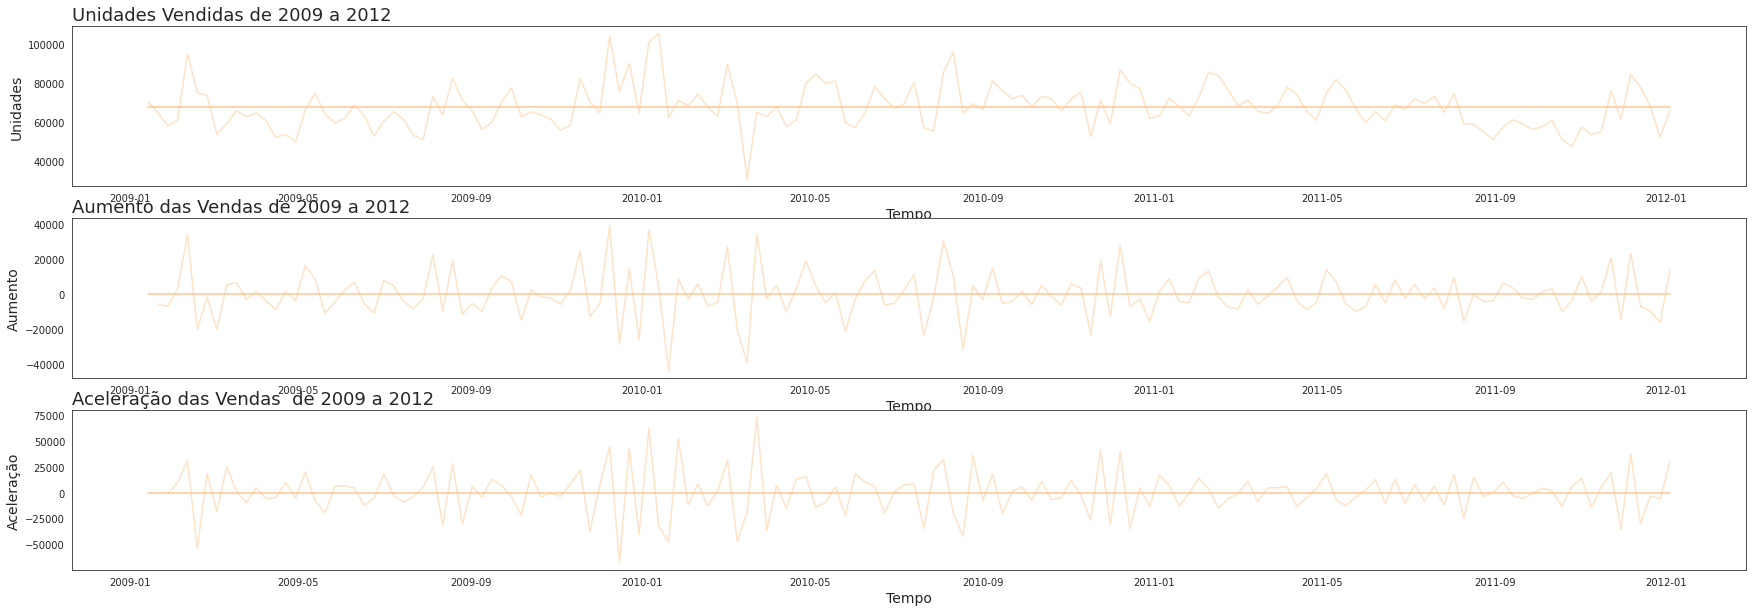

In [74]:
fig, eixo =plt.subplots(3,1, figsize=(30,10))

sns.set_palette('Oranges')
sns.set_style('white')

ax= sns.lineplot(x='WEEK_END_DATE', y='UNITS', data= tendencia, palette= 'gray_r', ax=eixo[0])
sns.lineplot(x='WEEK_END_DATE', y=tendencia.UNITS.mean(), data=tendencia, ax=eixo[0])
eixo[0].set_title("Unidades Vendidas de 2009 a 2012", loc= 'left', fontsize=18)
eixo[0].set_xlabel('Tempo', fontsize=14)
eixo[0].set_ylabel('Unidades', fontsize=14)

ax= sns.lineplot(x='WEEK_END_DATE', y='AUMENTO', data= tendencia, ax=eixo[1])
sns.lineplot(x='WEEK_END_DATE', y=tendencia.AUMENTO.mean(), data=tendencia, ax=eixo[1])

eixo[1].set_title("Aumento das Vendas de 2009 a 2012", loc= 'left', fontsize=18)
eixo[1].set_xlabel('Tempo', fontsize=14)
eixo[1].set_ylabel('Aumento', fontsize=14)

sns.lineplot(x='WEEK_END_DATE', y='ACELERACAO', data= tendencia, ax=eixo[2])
sns.lineplot(x='WEEK_END_DATE', y=tendencia.ACELERACAO.mean(), data=tendencia, ax=eixo[2])
eixo[2].set_title("Aceleração das Vendas  de 2009 a 2012", loc= 'left', fontsize=18)
eixo[2].set_xlabel('Tempo', fontsize=14)
eixo[2].set_ylabel('Aceleração', fontsize=14)



Observamos pelos gráficos que não há tendência no crescimento das unidades vendidas, já que a média de crecimento, representada pela linha, é 0 e os valores oscilam em torno dela. Será que alguma família de produtos obteve algum crescimento?

Text(0.5, 1.0, 'Tendência de vendas por categoria de produtos')

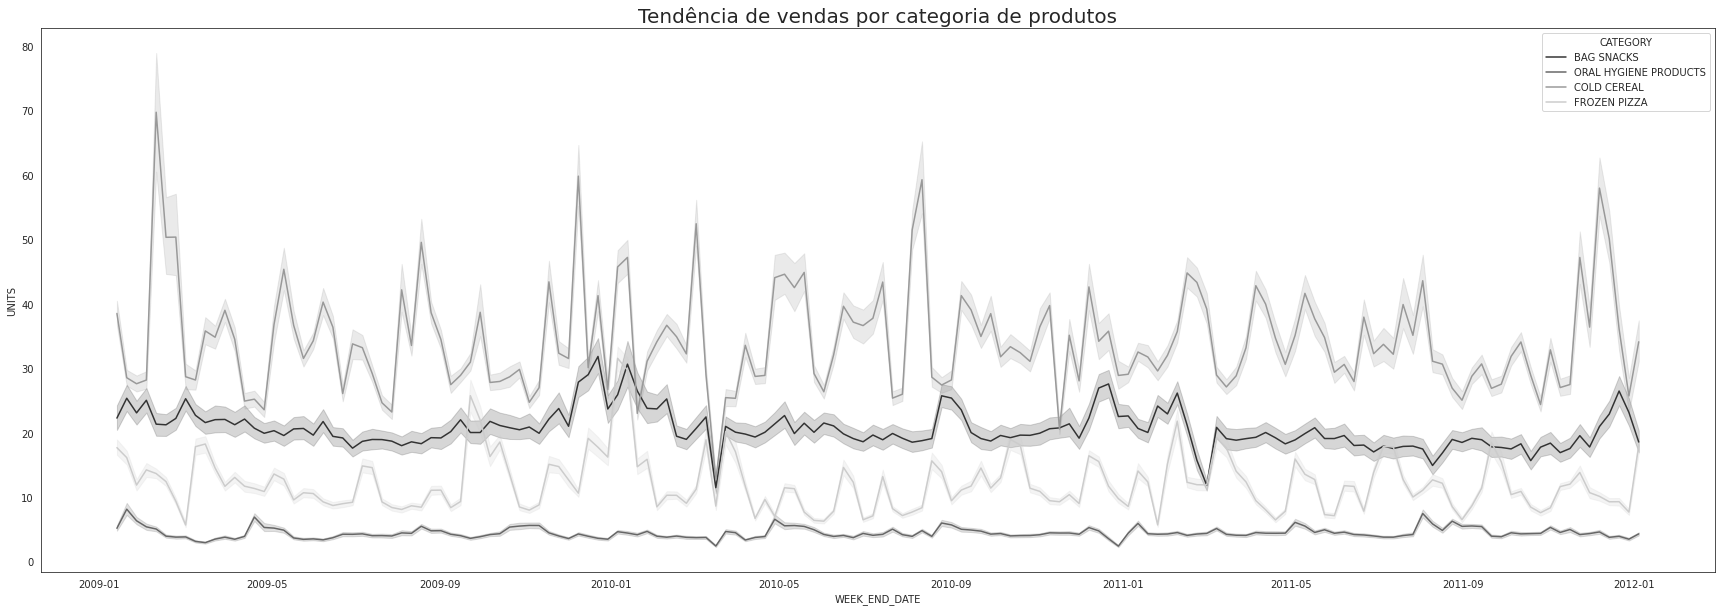

In [86]:
plt.figure(figsize=(30,10))
ax=sns.lineplot(x='WEEK_END_DATE', y='UNITS', data= tudo_junto, hue='CATEGORY', palette='gray')
ax.set_title('Tendência de vendas por categoria de produtos', fontsize=20)

Text(0.5, 1.0, 'Tendência de vendas por de produtos')

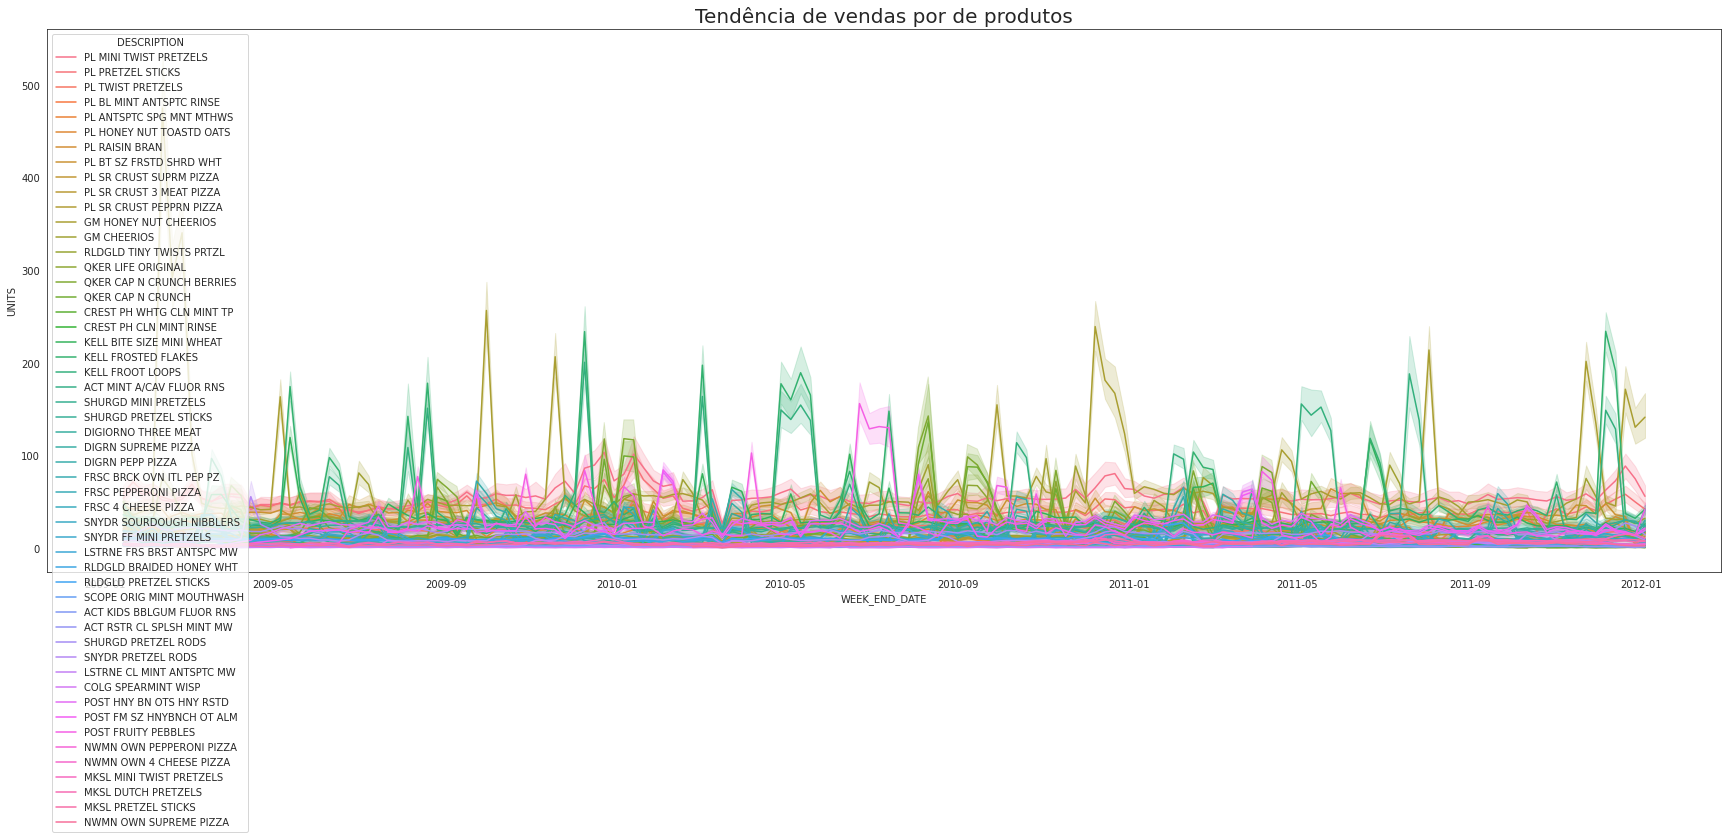

In [92]:
plt.figure(figsize=(30,10))
ax=sns.lineplot(x='WEEK_END_DATE', y='UNITS', data= tudo_junto, hue='DESCRIPTION')
ax.set_title('Tendência de vendas por de produtos', fontsize=20)

Visualmente não há tendência de crescimento para nenhum produto.